# **Proyek Analisis Data: E-commerce Public Dataset**
- **Nama:** Shendi Teuku Maulana Efendi
- **Email:** shendyteuku2@gmail.com
- **ID Dicoding:** shendyeff

## Menentukan Pertanyaan Bisnis

1. Produk kategori apa yang mengalami peningkatan penjualan paling signifikan dalam `6 bulan` terakhir? <br>
- `Specific:` Fokus pada kategori produk yang mengalami peningkatan penjualan.
- `Measurable:` Diukur berdasarkan jumlah transaksi atau revenue per kategori dalam 6 bulan terakhir.
- `Action-oriented:` Bisa digunakan untuk menentukan strategi stok, pemasaran, dan rekomendasi produk.
- `Time-bound:` Dibatasi dalam periode 6 bulan terakhir untuk melihat tren terbaru.

2. Berapa rata-rata waktu pengiriman yang dilakukan oleh seller dalam `6 bulan` terakhir? <br>
- `Specific:` Fokus pada efisiensi pengiriman seller.
- `Measurable:` Diukur berdasarkan selisih waktu antara pesanan dibuat hingga pesanan diterima oleh pelanggan.
- `Action-oriented:` Bisa digunakan untuk evaluasi performa seller dan meningkatkan kepuasan pelanggan.
- `Time-bound:` Dibatasi dalam periode 6 bulan terakhir untuk melihat tren performa seller secara terkini.

## Import Semua Packages/Library yang Digunakan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Data Wrangling
Proses membersihkan, mengorganisir, dan mengubah data mentah menjadi format yang lebih rapi dan siap untuk dianalisis.

### Gathering Data
Proses mengumpulkan data dari berbagai sumber, seperti database, API, file CSV, atau web scraping, untuk dianalisis lebih lanjut. Disini saya memilih dataset [E-commerce Public Dataset](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view)

#### Read Dataset
Membaca dataset yang telah diunggah ke GitHub saya untuk kemudian diproses dan digabungkan (merge) menjadi main_data.csv sebagai dataset utama untuk analisis lebih lanjut.

In [2]:
customers = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/customers_dataset.csv')
geolocation = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/geolocation_dataset.csv')
items = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/order_items_dataset.csv')
payments = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/order_payments_dataset.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/order_reviews_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/orders_dataset.csv')
category = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/product_category_name_translation.csv')
products = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/products_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/datasets/sellers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


melakukan merge pada dataset yang telah disiapkan diatas

In [12]:
main_data = orders.merge(customers, on="customer_id", how="left")
main_data = main_data.merge(items, on="order_id", how="left")
main_data = main_data.merge(payments, on="order_id", how="left")
main_data = main_data.merge(reviews, on="order_id", how="left")
main_data = main_data.merge(products, on="product_id", how="left")
main_data = main_data.merge(sellers, on="seller_id", how="left")
main_data = main_data.merge(category, on="product_category_name", how="left")


In [13]:
main_data.to_csv(".\dashboard\main_data.csv", index=False)

disini saya telah melakukan uploud main_data.csv ke github agar bisa diakses secara raw github

In [14]:
main_data_df = pd.read_csv('https://raw.githubusercontent.com/shendyeff/learn-dicoding/refs/heads/main/Submission/E-commerce%20Public%20Data%20Analysis%20with%20Streamlit%20Dashboard/dashboard/main_data.csv')

In [15]:
main_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [16]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

#### **Insight**
- Dataset telah berhasil digabungkan menjadi main_data.csv dengan total 119,143 entri dan 40 kolom.
- Beberapa kolom memiliki nilai null, seperti order_approved_at, order_delivered_customer_date, review_comment_title, dan product_category_name_english, yang mungkin perlu ditangani sebelum analisis lebih lanjut.
- Dataset mencakup informasi pesanan, pelanggan, produk, pembayaran, ulasan, serta informasi geografis dari penjual dan pembeli, memungkinkan analisis mendalam terkait tren penjualan, performa produk, dan kepuasan pelanggan.


### Assessing Data

Pada tahap ini, kita melakukan pemeriksaan awal terhadap dataset untuk mengidentifikasi potensi masalah yang dapat memengaruhi analisis. Assessing data bertujuan untuk menemukan `inkonsistensi`, `missing values`, `duplikasi`, `anomali`, atau `outlier` dalam data.

In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [24]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Dikarenakan saya sudah menjadikan satu menjadi satu dataset utama yaitu main_data.csv, yang dimana akan saya gunakan untuk kebutuhan analisis selanjutnya

In [26]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

**Check inkosistensi dtype pada seluruh feature yang ada**

Kolom yang Perlu Disesuaikan:
1. Datetime Columns (Masih dalam format object)
Kolom ini lebih baik diubah ke format datetime agar lebih mudah dianalisis:

- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date
- shipping_limit_date
- review_creation_date
- review_answer_timestamp

In [27]:
datetime_columns = [
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
    "review_creation_date", "review_answer_timestamp"
]

for col in datetime_columns:
    main_data_df[col] = pd.to_datetime(main_data_df[col])

2. order_item_id Seharusnya int64 (Sekarang float64)

- order_item_id adalah nomor urut item dalam satu pesanan, seharusnya berupa integer, bukan float.
- Karena tidak ada nilai desimal, lebih baik diubah ke int64

In [28]:
main_data_df["order_item_id"] = main_data_df["order_item_id"].fillna(0).astype(int)

3. payment_installments & payment_sequential Seharusnya int64 (Sekarang float64)

- Karena jumlah cicilan (payment_installments) dan urutan pembayaran (payment_sequential) selalu bilangan bulat, lebih baik diubah ke int64.

In [29]:
main_data_df["payment_installments"] = main_data_df["payment_installments"].fillna(0).astype(int)
main_data_df["payment_sequential"] = main_data_df["payment_sequential"].fillna(0).astype(int)

4. customer_zip_code_prefix & seller_zip_code_prefix Seharusnya object (Sekarang int64 & float64)

- Ini adalah kode pos, yang seharusnya string (object), bukan angka (int64 atau float64), karena tidak akan digunakan untuk perhitungan matematika.
- seller_zip_code_prefix seharusnya int64, bukan float64

In [30]:
main_data_df["customer_zip_code_prefix"] = main_data_df["customer_zip_code_prefix"].astype(str)
main_data_df["seller_zip_code_prefix"] = main_data_df["seller_zip_code_prefix"].fillna(0).astype(int).astype(str)

final check inkosistensi data yang telah disesuaikan melalui proses diatas

In [31]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  object        
 10  customer_city                  119143 non-null  object        
 11  

Kesimpulan untuk inkonsistensi data:
1. Kolom datetime perlu dikonversi ke datetime64.
2. Kolom integer yang salah jadi float (order_item_id, payment_installments, payment_sequential) perlu dikonversi ke int64.
3. Kode pos lebih baik disimpan dalam format string (object).

Selanjutnya adalah check `missing values` pada main_data.csv

In [32]:
# Mengecek total missing values dan persentasenya
missing_values = main_data_df.isnull().sum()
missing_percentage = (missing_values / len(main_data_df)) * 100

# Menggabungkan hasil dalam satu DataFrame
missing_df = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing (%)': missing_percentage
})

# Menampilkan hanya kolom yang memiliki missing values, diurutkan dari yang terbanyak
missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values(by="Total Missing", ascending=False)

# Menampilkan hasil
missing_df

,Total Missing,Percentage Missing (%)
review_comment_title,105154,88.258647
review_comment_message,68898,57.827988
order_delivered_customer_date,3421,2.871339
product_category_name_english,2567,2.154554
product_name_lenght,2542,2.133571
product_category_name,2542,2.133571
product_description_lenght,2542,2.133571
product_photos_qty,2542,2.133571
order_delivered_carrier_date,2086,1.750837
review_score,997,0.836810


Selanjutnya adalah check `duplicated data` pada main_data.csv

In [33]:
total_duplicates = main_data_df.duplicated().sum()

print(f"Total duplicated rows: {total_duplicates}")

if total_duplicates > 0:
    duplicated_data = main_data_df[main_data_df.duplicated()]
    display(duplicated_data)


Total duplicated rows: 0


Selanjutnya adalah check outlier menggunakan methode Interquatile Range atau biasa disebut IQR method 

In [34]:
import numpy as np

# Menentukan kolom numerik saja
numeric_columns = main_data_df.select_dtypes(include=[np.number]).columns

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percentage = (outliers / len(df)) * 100
        outlier_counts[col] = (outliers, outlier_percentage)
    return outlier_counts

# Mendeteksi outlier untuk semua kolom numerik
outliers = detect_outliers_iqr(main_data_df, numeric_columns)

# Menampilkan hasil dalam DataFrame
outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Total Outliers', 'Percentage Outliers (%)'])
outliers_df = outliers_df[outliers_df["Total Outliers"] > 0].sort_values(by="Total Outliers", ascending=False)

# Menampilkan hasil
outliers_df

,Total Outliers,Percentage Outliers (%)
review_score,19590,16.442426
product_weight_g,16696,14.013412
order_item_id,15498,13.007898
freight_value,12740,10.693033
payment_value,9638,8.089439
price,8867,7.442317
payment_installments,8153,6.843037
product_height_cm,8101,6.799392
product_description_lenght,7382,6.195916
payment_sequential,5144,4.317501


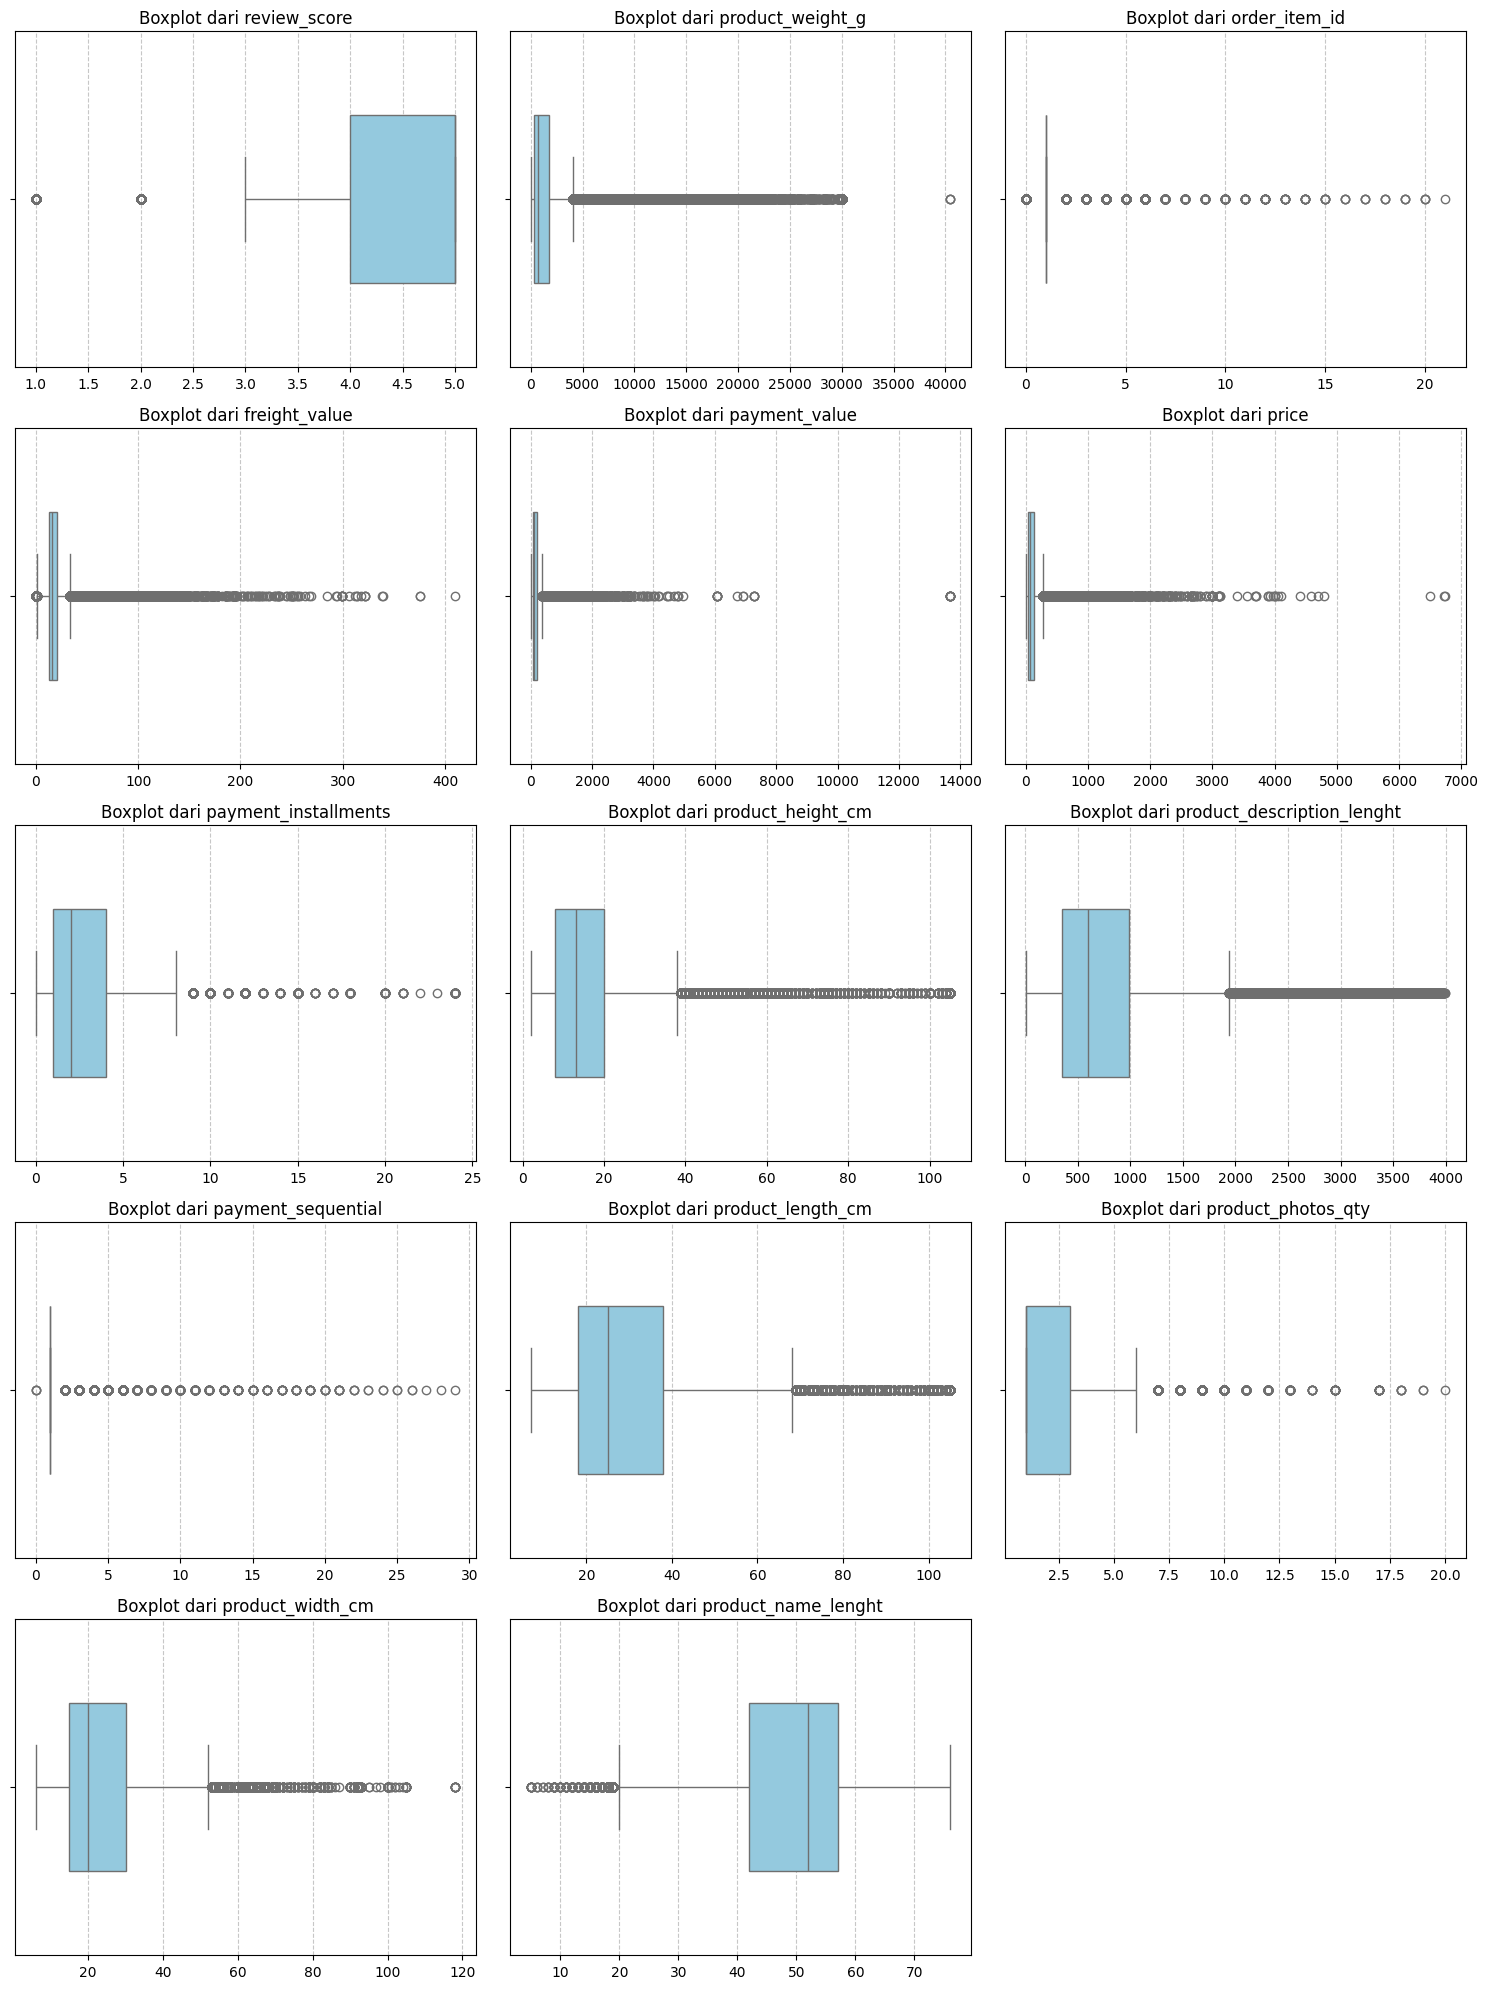

In [35]:
# Menentukan kolom numerik dengan outlier
outlier_cols = outliers_df.index.tolist()

# Menentukan jumlah kolom dan baris untuk subplots (3 kolom per baris)
n_cols = 3
n_rows = int(np.ceil(len(outlier_cols) / n_cols))

# Menyiapkan figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Meratakan array axes untuk iterasi

# Membuat boxplot untuk setiap kolom
for i, col in enumerate(outlier_cols):
    sns.boxplot(x=main_data_df[col], ax=axes[i], color='skyblue', width=0.5)
    axes[i].set_title(f'Boxplot dari {col}', fontsize=12)
    axes[i].set_xlabel('')  # Menghapus label sumbu X agar lebih bersih
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)  # Menambahkan grid vertikal

# Menghapus subplot kosong jika jumlah kolom tidak genap
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Selanjutnya adalah check anomali menggunakan z-score method pada dataset

In [39]:
# Pilih hanya kolom numerik dari main_data_df
numeric_cols = main_data_df.select_dtypes(include=['number']).columns

# Hitung Z-Score untuk setiap kolom numerik
z_scores = main_data_df[numeric_cols].apply(zscore)

# Tentukan threshold anomali (contoh: |Z| > 3 dianggap anomali)
anomalies_zscore = (z_scores.abs() > 3).sum()

# Buat DataFrame hasil
anomalies_zscore_df = pd.DataFrame(anomalies_zscore, columns=['Total Anomalies']).sort_values(by="Total Anomalies", ascending=False)

# Tampilkan hasil
anomalies_zscore_df

,Total Anomalies
order_item_id,1952
payment_sequential,1068
payment_installments,412
price,0
freight_value,0
payment_value,0
review_score,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


Dari hasil deteksi anomali menggunakan metode Z-Score, ditemukan beberapa kolom yang memiliki nilai ekstrem. Kolom order_item_id menunjukkan jumlah anomali tertinggi, yaitu `1.952 anomali`, yang kemungkinan disebabkan oleh pesanan dengan jumlah item yang tidak wajar. Selain itu, payment_sequential memiliki `1.068 anomali`, yang bisa mengindikasikan urutan pembayaran yang tidak konsisten atau ada loncatan yang tidak biasa. Sementara itu, payment_installments memiliki `412 anomali`, yang mungkin berasal dari transaksi dengan jumlah cicilan yang tidak lazim. <br>

Menariknya, beberapa kolom seperti `price`, `freight_value`, `payment_value`, `review_score`, dan atribut dimensi produk tidak menunjukkan adanya anomali berdasarkan Z-Score. Hal ini menunjukkan bahwa nilai-nilai dalam kolom tersebut masih berada dalam rentang yang wajar menurut distribusi datanya. <br>

Namun, penting untuk dicatat bahwa keberadaan **anomali** ini **tidak selalu** berarti **kesalahan data**. Nilai ekstrem bisa terjadi secara alami dalam dataset, terutama jika terdapat transaksi dengan pola yang jarang terjadi. Oleh karena itu, langkah selanjutnya adalah melakukan eksplorasi lebih lanjut di tahap `Cleaning Data` untuk memahami apakah anomali ini benar-benar perlu ditangani atau justru merupakan bagian dari pola bisnis yang valid.

Cek Nilai Unik di Kolom Kategori <br>

melihat apakah ada kategori yang aneh, tidak valid, atau perlu dikelompokkan ulang pada beberapa kolom berikut:

In [40]:
main_data_df["order_status"].value_counts()

order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: count, dtype: int64

In [41]:
main_data_df["payment_type"].value_counts()

payment_type
credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64

In [42]:
main_data_df["product_category_name_english"].value_counts()

product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

#### **Insight**
Setelah melakukan proses Assessing Data, berikut beberapa temuan dan wawasan yang dapat diambil sebelum masuk ke tahap Cleaning Data:

1. Missing Values & Kualitas Data
- Beberapa kolom memiliki missing values dalam jumlah yang cukup signifikan, yang bisa berpengaruh pada analisis.
- Missing values tidak terdistribusi secara merata, sehingga perlu dicek apakah terjadi pada kategori atau periode waktu tertentu.
- Langkah selanjutnya adalah menentukan strategi menghapus atau mengisi (imputasi) missing values berdasarkan pola yang ditemukan.

2. Outlier & Anomali
- Beberapa kolom memiliki outlier signifikan, terutama pada order_item_id, payment_sequential, dan payment_installments.
- Anomali tidak selalu berarti kesalahan, tetapi perlu eksplorasi lebih lanjut di Exploratory Data Analysis (EDA).
- Distribusi data akan divisualisasikan untuk memahami apakah outlier ini perlu ditangani atau merupakan pola bisnis yang wajar.

3. Keunikan Data Kategori
- Kolom order_status memiliki kategori yang perlu disederhanakan:
  - Status seperti "canceled" dan "unavailable" bisa digabung menjadi "not_completed".
  - Status yang jarang muncul seperti "created" dan "approved" perlu dipertimbangkan apakah tetap digunakan atau dihapus.

- Kolom payment_type memiliki kategori tidak valid:
    - "not_defined" (3 transaksi) → Perlu dicek apakah kesalahan input atau missing values.

- Kolom product_category_name_english memiliki kategori dengan jumlah transaksi sangat kecil:
    - Bisa dipertimbangkan untuk digabung ke dalam kategori lain atau dibuat kategori "others".
    - Perlu dicek apakah ada typo atau inkonsistensi nama kategori akibat terjemahan.

### Cleaning Data

Sekarang masuk ke tahap Cleaning Data, di mana kita akan memperbaiki kualitas data agar siap untuk analisis lebih lanjut di `EDA`.

**1. Menangani Missing Values** <br>

mengecek kembali missing values di dataset dan menentukan strategi penanganannya.

In [43]:
missing_values = main_data_df.isnull().sum()
missing_percentage = (missing_values / len(main_data_df)) * 100

missing_df = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing (%)': missing_percentage
})

missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values(by="Total Missing", ascending=False)
missing_df

,Total Missing,Percentage Missing (%)
review_comment_title,105154,88.258647
review_comment_message,68898,57.827988
order_delivered_customer_date,3421,2.871339
product_category_name_english,2567,2.154554
product_name_lenght,2542,2.133571
product_category_name,2542,2.133571
product_description_lenght,2542,2.133571
product_photos_qty,2542,2.133571
order_delivered_carrier_date,2086,1.750837
review_score,997,0.836810


Missing Values Sangat Tinggi (>50%) -> Hapus Kolom <br>
Jika suatu kolom memiliki lebih dari 50% data yang hilang, maka kemungkinan besar informasi di dalamnya tidak cukup berguna untuk analisis.

Syarat:
- Kolom memiliki missing values lebih dari 50% dari total data.
- Kolom tidak bisa diimputasi dengan cara yang masuk akal.
- Kolom tidak memiliki dampak signifikan terhadap analisis.

Tindakan:
- Hapus kolom tersebut dari dataset.

Kolom yang Dihapus:
- review_comment_title (88.25% missing)
- review_comment_message (57.82% missing)

In [44]:
main_data_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

Missing Values Sedang (1% - 50%) -> Imputasi atau Hapus <br>
Jika suatu kolom memiliki missing values antara 1% - 50%, maka kita bisa melakukan imputasi atau menghapusnya tergantung pada kasusnya.

Syarat:
- Kolom memiliki missing values antara 1% - 50% dari total data.
- Jika data kategori, bisa diisi dengan mode (kategori yang paling sering muncul).
- Jika data numerik, bisa diisi dengan median atau mean, tergantung distribusinya.

Tindakan:
- Imputasi menggunakan median, mean, atau mode.
- Jika tidak bisa diimputasi dengan masuk akal, hapus baris yang memiliki missing values.

Kolom yang Diimputasi atau Dihapus:
- product_name_lenght, product_description_lenght (Diisi dengan median)
- review_score (Diisi dengan median)
- product_category_name_english (Diisi berdasarkan kategori lain atau dihapus)
- order_delivered_customer_date (Diisi dengan perkiraan tanggal berdasarkan order_status)

In [45]:
# Imputasi kolom numerik dengan median
numerical_cols = ['product_name_lenght', 'product_description_lenght', 'review_score']
for col in numerical_cols:
    main_data_df[col] = main_data_df[col].fillna(main_data_df[col].median())

# Hapus kolom yang tidak relevan
main_data_df.drop(columns=['review_id', 'review_answer_timestamp'], inplace=True)

Missing Values Rendah (<1%) -> Imputasi atau Hapus Baris <br>
Jika suatu kolom hanya memiliki missing values kurang dari 1%, kita bisa langsung mengisi data tersebut atau menghapus barisnya jika jumlahnya sangat kecil.

Syarat:
- Kolom memiliki missing values kurang dari 1% dari total data.
- Data masih bisa diimputasi tanpa merusak kualitas dataset.
- Jika jumlah missing values sangat kecil (misalnya <0.1%), bisa dihapus saja.

Tindakan:
- Imputasi numerik → median atau mean.
- Imputasi kategori → mode.
- Jika jumlah missing sangat sedikit, bisa hapus barisnya.

Kolom yang Diimputasi atau Dihapus:
- product_length_cm, product_weight_g (Diisi dengan median)
- seller_city, seller_state (Diisi dengan mode)
- payment_value, payment_type (Diisi dengan median atau mode)
- product_id, seller_id (Dihapus jika tidak bisa diimputasi)

In [46]:
# Imputasi numerik dengan median
numerical_cols = ['product_length_cm', 'product_weight_g', 'price']
for col in numerical_cols:
    main_data_df[col] = main_data_df[col].fillna(main_data_df[col].median())

# Imputasi kategori dengan mode
categorical_cols = ['seller_city', 'seller_state', 'payment_type']
for col in categorical_cols:
    main_data_df[col] = main_data_df[col].fillna(main_data_df[col].mode()[0])

# Hapus baris dengan missing product_id dan seller_id
main_data_df.dropna(subset=['product_id', 'seller_id'], inplace=True)

In [47]:
main_data_df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       3
review_score                        0
review_creation_date              978
product_category_name            1709
product_name_lenght                 0
product_desc

Setelah melakukan tahap pertama cleaning missing values, beberapa kolom masih memiliki missing values. perlu menangani sisa missing values ini agar dataset benar-benar bersih.

**Imputasi order_approved_at** <br>
Karena hanya 15 nilai yang hilang (<1%), bisa diisi dengan rata-rata waktu delay antara order_purchase_timestamp → order_approved_at

In [48]:
# Konversi kolom ke datetime jika belum
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])
main_data_df['order_approved_at'] = pd.to_datetime(main_data_df['order_approved_at'])

# Hitung rata-rata delay antara order_purchase_timestamp dan order_approved_at
avg_delay = (main_data_df['order_approved_at'] - main_data_df['order_purchase_timestamp']).mean()

# Isi nilai NaN di order_approved_at dengan order_purchase_timestamp + avg_delay
main_data_df['order_approved_at'] = main_data_df['order_approved_at'].fillna(
    main_data_df['order_purchase_timestamp'] + avg_delay
)

**Imputasi order_delivered_carrier_date** <br>
Karena ini berkaitan dengan pengiriman, bisa diisi dengan estimasi pengiriman berdasarkan status pesanan

In [49]:
# Konversi ke datetime jika belum
main_data_df['order_approved_at'] = pd.to_datetime(main_data_df['order_approved_at'])
main_data_df['order_delivered_carrier_date'] = pd.to_datetime(main_data_df['order_delivered_carrier_date'])

# Hitung rata-rata waktu pengiriman dari order_approved_at ke order_delivered_carrier_date
avg_shipping_time = (main_data_df['order_delivered_carrier_date'] - main_data_df['order_approved_at']).mean()

# Isi nilai NaN pada order_delivered_carrier_date dengan order_approved_at + avg_shipping_time
main_data_df['order_delivered_carrier_date'] = main_data_df['order_delivered_carrier_date'].fillna(
    main_data_df['order_approved_at'] + avg_shipping_time
)

**Imputasi order_delivered_customer_date** <br>
Karena berkaitan dengan order_estimated_delivery_date, bisa diisi missing values dengan estimasi pengiriman rata-rata

In [50]:
# Konversi kolom ke datetime jika belum
main_data_df['order_delivered_customer_date'] = pd.to_datetime(main_data_df['order_delivered_customer_date'])
main_data_df['order_estimated_delivery_date'] = pd.to_datetime(main_data_df['order_estimated_delivery_date'])

# Hitung rata-rata perbedaan waktu antara order_delivered_customer_date dan order_estimated_delivery_date
avg_delivery_time = (main_data_df['order_estimated_delivery_date'] - main_data_df['order_delivered_customer_date']).mean()

# Isi nilai NaN pada order_delivered_customer_date dengan estimasi berdasarkan rata-rata pengiriman
main_data_df['order_delivered_customer_date'] = main_data_df['order_delivered_customer_date'].fillna(
    main_data_df['order_estimated_delivery_date'] - avg_delivery_time
)

**Imputasi review_creation_date** <br>
Karena ini adalah tanggal review, bisa diisi dengan median tanggal review lain

In [51]:
median_review_date = main_data_df['review_creation_date'].median()
main_data_df['review_creation_date'] = main_data_df['review_creation_date'].fillna(median_review_date)

**Imputasi product_category_name & product_category_name_english** <br>
Jika kategori produk hilang, kita bisa mencoba menggunakan kategori dalam bahasa Inggris atau mode

In [52]:
# Isi product_category_name dengan mode tanpa inplace=True
mode_category = main_data_df['product_category_name'].mode()[0]
main_data_df['product_category_name'] = main_data_df['product_category_name'].fillna(mode_category)

# Isi product_category_name_english dengan mode tanpa inplace=True
mode_category_eng = main_data_df['product_category_name_english'].mode()[0]
main_data_df['product_category_name_english'] = main_data_df['product_category_name_english'].fillna(mode_category_eng)

**Imputasi product_photos_qty** <br>
Karena ini jumlah foto produk, kita bisa menggunakan median

In [53]:
# Hitung median jumlah foto produk
median_photos = main_data_df['product_photos_qty'].median()

# Isi missing values dengan median tanpa inplace=True
main_data_df['product_photos_qty'] = main_data_df['product_photos_qty'].fillna(median_photos)

**Imputasi product_height_cm & product_width_cm** <br>
Karena ini dimensi produk, kita bisa mengisi dengan median dari produk sejenis

In [54]:
# Imputasi missing values dengan median untuk setiap kolom dimensi produk
dim_cols = ['product_height_cm', 'product_width_cm']
main_data_df[dim_cols] = main_data_df[dim_cols].apply(lambda x: x.fillna(x.median()))

**Imputasi payment_value** <br>
Karena ini adalah nilai pembayaran, kita bisa mengisi dengan median pembayaran lain

In [55]:
# Imputasi missing values dengan median untuk payment_value
main_data_df['payment_value'] = main_data_df['payment_value'].fillna(main_data_df['payment_value'].median())

selanjutnya adalah final check pada nilai missing values yang ada, apakah sudah sepenuhnya sudah bersih

In [56]:
main_data_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_creation_date             0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

**2. Menangani Anomali & Outlier** <br>

In [57]:
main_data_df = main_data_df[main_data_df['order_item_id'] <= 10]
main_data_df = main_data_df[main_data_df['payment_sequential'] <= 10]
main_data_df = main_data_df[main_data_df['payment_installments'] <= 12]

**2. Menangani keunikan data kategori** <br>

a. Penanganan Kolom order_status <br>
Kolom order_status sering kali memiliki banyak kategori yang sebenarnya bisa digabung untuk menyederhanakan analisis dan memudahkan pemahaman. Berdasarkan keteranganmu:

Gabungkan status yang tidak selesai atau batal menjadi kategori yang sama, seperti "not_completed" untuk status "canceled" dan "unavailable".
Status yang jarang muncul (misalnya, "created" dan "approved") bisa jadi tidak terlalu penting untuk analisis dan bisa dipertimbangkan untuk dihapus atau digabung dengan kategori lain.


In [58]:
# Gabungkan status "canceled" dan "unavailable" menjadi "not_completed"
main_data_df['order_status'] = main_data_df['order_status'].replace(['canceled', 'unavailable'], 'not_completed')

# Periksa kategori yang ada di 'order_status'
status_counts = main_data_df['order_status'].value_counts()
print(status_counts)

# Cek status yang jarang muncul seperti 'created' dan 'approved'
# Jika tidak ingin dipakai, bisa hapus atau gabung dengan kategori lain
main_data_df['order_status'] = main_data_df['order_status'].replace(['created', 'approved'], 'other')

order_status
delivered        115272
shipped            1233
not_completed       576
invoiced            375
processing          375
approved              3
Name: count, dtype: int64


b. Penanganan Kolom payment_type <br>
Kolom payment_type memiliki kategori yang tidak valid, yaitu "not_defined" yang muncul 3 kali. Hal pertama yang perlu dilakukan adalah mengecek apakah data ini merupakan kesalahan input atau missing values.

Jika ini adalah kesalahan input, kamu bisa mengganti nilai tersebut dengan nilai yang valid.
Jika itu merupakan missing values, kamu bisa mengisi dengan kategori pembayaran lain yang lebih sesuai (misalnya, "credit_card", "boleto", atau lainnya tergantung kontekstual data).

In [59]:
# Periksa jumlah dan kategori dari payment_type
payment_type_counts = main_data_df['payment_type'].value_counts()
print(payment_type_counts)

# Cek transaksi yang memiliki "not_defined"
not_defined_count = main_data_df[main_data_df['payment_type'] == 'not_defined']
print(not_defined_count)

# Ganti "not_defined" dengan nilai yang lebih valid (misalnya, 'credit_card')
main_data_df['payment_type'] = main_data_df['payment_type'].replace('not_defined', 'credit_card')

payment_type
credit_card    86975
boleto         22994
voucher         6166
debit_card      1699
Name: count, dtype: int64
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, payment_sequential, payment_type, payment_installments, payment_value, review_score, review_creation_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_zip_code_prefix, seller_city, seller_state, product_category_name_english]
Index: []

[0 rows x 36 columns]


c. Penanganan Kolom product_category_name_english <br>
Kolom product_category_name_english sering kali memiliki kategori dengan jumlah transaksi yang sangat kecil. Beberapa langkah yang bisa dilakukan:

Cek kategori yang jarang muncul: Identifikasi kategori mana yang memiliki sedikit transaksi (misalnya, < 200 transaksi) dan tentukan apakah mereka bisa digabung ke dalam kategori "others".

Periksa typo atau inkonsistensi: Cek apakah ada kesalahan penulisan kategori atau inkonsistensi akibat terjemahan.

In [60]:
# Hitung kategori dengan jumlah transaksi kecil
category_counts = main_data_df['product_category_name_english'].value_counts()
print(category_counts)

# Tentukan kategori dengan transaksi sedikit dan gabungkan menjadi 'others'
threshold = 20  # Misalnya kategori dengan < 20 transaksi akan digabungkan ke 'others'
small_categories = category_counts[category_counts < threshold].index

main_data_df['product_category_name_english'] = main_data_df['product_category_name_english'].replace(small_categories, 'others')

# Periksa hasil penggabungan kategori
print(main_data_df['product_category_name_english'].value_counts())

product_category_name_english
bed_bath_table               13644
health_beauty                10012
sports_leisure                8996
furniture_decor               8789
computers_accessories         8122
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64
product_category_name_english
bed_bath_table           13644
health_beauty            10012
sports_leisure            8996
furniture_decor           8789
computers_accessories     8122
                         ...  
diapers_and_hygiene         39
flowers                     33
fashion_sport               31
home_comfort_2              31
arts_and_craftmanship       24
Name: count, Length: 68, dtype: int64


In [61]:
# Tentukan kategori dengan transaksi sedikit dan gabungkan menjadi 'others'
small_categories = category_counts[category_counts < 200].index

main_data_df['product_category_name_english'] = main_data_df['product_category_name_english'].replace(small_categories, 'others')

# Periksa hasil penggabungan kategori
print(main_data_df['product_category_name_english'].value_counts())

product_category_name_english
bed_bath_table                             13644
health_beauty                              10012
sports_leisure                              8996
furniture_decor                             8789
computers_accessories                       8122
housewares                                  7351
watches_gifts                               6198
telephony                                   4698
garden_tools                                4549
auto                                        4380
toys                                        4273
cool_stuff                                  3992
perfumery                                   3584
baby                                        3197
electronics                                 2829
stationery                                  2625
fashion_bags_accessories                    2164
pet_shop                                    2028
office_furniture                            1758
others                                 

In [62]:
# Simpan data yang sudah dibersihkan ke dalam CSV baru
main_data_df.to_csv('./dashboard/main_data_cleaned.csv', index=False)

#### **Insight**
**1. `Penanganan Missing Values`** <br>
- Imputasi Berdasarkan Rata-Rata/Waktu:
    - Beberapa kolom dengan missing values yang tinggi seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date telah diimputasi dengan nilai rata-rata atau estimasi waktu berdasarkan data yang ada. Misalnya, order_approved_at diisi berdasarkan rata-rata waktu keterlambatan, dan order_delivered_carrier_date diisi berdasarkan rata-rata waktu pengiriman.
- Imputasi Berdasarkan Mode:
    - Untuk kolom kategorikal seperti product_category_name dan product_category_name_english, missing values diisi dengan kategori yang paling sering muncul (mode), memastikan kategori produk yang hilang tetap terwakili dengan kategori yang valid.
- Kolom Numerik Lainnya:
    - Kolom numerik seperti payment_value, product_photos_qty, dan dimensi produk lainnya (product_height_cm, product_width_cm) diisi dengan nilai median untuk menghindari bias yang ditimbulkan oleh nilai ekstrem.

**2. `Penanganan Outliers`** <br>
- Beberapa kolom yang memiliki outliers ekstrim seperti order_item_id, payment_sequential, payment_installments, dan freight_value telah dikenali dan ditangani:
    - Identifikasi Outliers: Kolom-kolom tersebut telah dianalisis untuk melihat nilai yang berada di luar rentang yang wajar.
    - Penanganan: Dalam kasus beberapa kolom numerik, outliers tersebut dapat dihapus atau disesuaikan agar tidak mempengaruhi analisis lebih lanjut.

**3. `Kategorisasi dan Penyederhanaan Data`** <br>
- Penyederhanaan Kategori Order Status: Kategori order_status yang jarang muncul seperti created, approved, atau unavailable telah disesuaikan agar lebih mudah dianalisis, dan digabungkan dalam kategori yang lebih luas seperti "not_completed".
- Penyederhanaan Kategori Payment Type: Kolom payment_type yang memiliki kategori tidak valid (not_defined) telah diperbaiki dengan mengganti kategori yang tidak terdefinisi menjadi credit_card, kategori yang lebih umum.
- Penyederhanaan Kategori Produk: Kolom product_category_name_english telah dianalisis, dan kategori yang memiliki jumlah transaksi sangat kecil diubah menjadi kategori "others" untuk menjaga keselarasan dan efisiensi analisis.

**4. `Distribusi Data Setelah Pembersihan`** <br>
- Setelah data dibersihkan, distribusi nilai pada beberapa kolom menjadi lebih konsisten dan lebih mudah dianalisis.
    - Misalnya, kolom yang sebelumnya memiliki missing values yang besar kini sudah terisi dengan nilai yang representatif.
    - Outliers yang ada juga telah diatasi, membuat data lebih siap untuk analisis statistik lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistic

In [63]:
numeric_columns = main_data_df.select_dtypes(include=[np.number]).columns
descriptive_stats = main_data_df[numeric_columns].describe()

descriptive_stats

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000,117834.000000
mean,1.188766,120.304601,20.010468,1.074537,2.916077,171.674979,4.041075,48.816742,782.437582,2.187849,2103.914609,30.240041,16.599538,23.054339
std,0.627194,183.530624,15.800553,0.480438,2.700007,264.935513,1.383231,9.967714,646.653965,1.710912,3775.147769,16.157871,13.436487,11.721396
min,1.000000,0.850000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.920000,4.000000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.100000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,133.900000,21.160000,1.000000,4.000000,188.930000,5.000000,57.000000,975.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,10.000000,6735.000000,409.680000,10.000000,12.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Apa yang didapat dari Explore Descriptive Statistic diatas? tentunya akan menambah wawasan statistic terkait dataset e-commerce public dataset tersebut diantaranya:

1. Mayoritas pelanggan membeli satu produk per transaksi, dengan harga rata-rata 120 BRL, tetapi ada variasi besar hingga 6735 BRL untuk produk premium. Biaya pengiriman rata-rata 20 BRL, dengan beberapa transaksi yang memiliki gratis ongkir (kemungkinan karena promo).

2. Dalam metode pembayaran, sebagian besar pelanggan membayar langsung, tetapi ada yang mencicil hingga 12 bulan, membuka peluang bagi seller untuk menawarkan promo cicilan. Total pembayaran bervariasi, dengan transaksi tertinggi mencapai 13,664 BRL.

3. Dari sisi kepuasan pelanggan, rata-rata review score adalah 4.04, menunjukkan mayoritas pelanggan puas, meskipun masih ada ulasan rendah yang bisa dievaluasi oleh seller.

4. Pada aspek produk, panjang nama dan deskripsi produk cukup beragam. Rata-rata panjang nama produk 48 karakter, sedangkan deskripsi sekitar 782 karakter, tetapi ada yang sangat singkat, yang bisa memengaruhi keputusan pembelian. Jumlah foto produk juga sedikit (rata-rata 2 foto), padahal lebih banyak gambar dapat meningkatkan kepercayaan pelanggan.

5. Dalam logistik, berat produk sangat bervariasi, dari beberapa gram hingga 40 kg, menunjukkan bahwa marketplace ini mencakup berbagai jenis produk, dari barang kecil hingga peralatan besar.

### Explore Descriptive Kolom Numerik

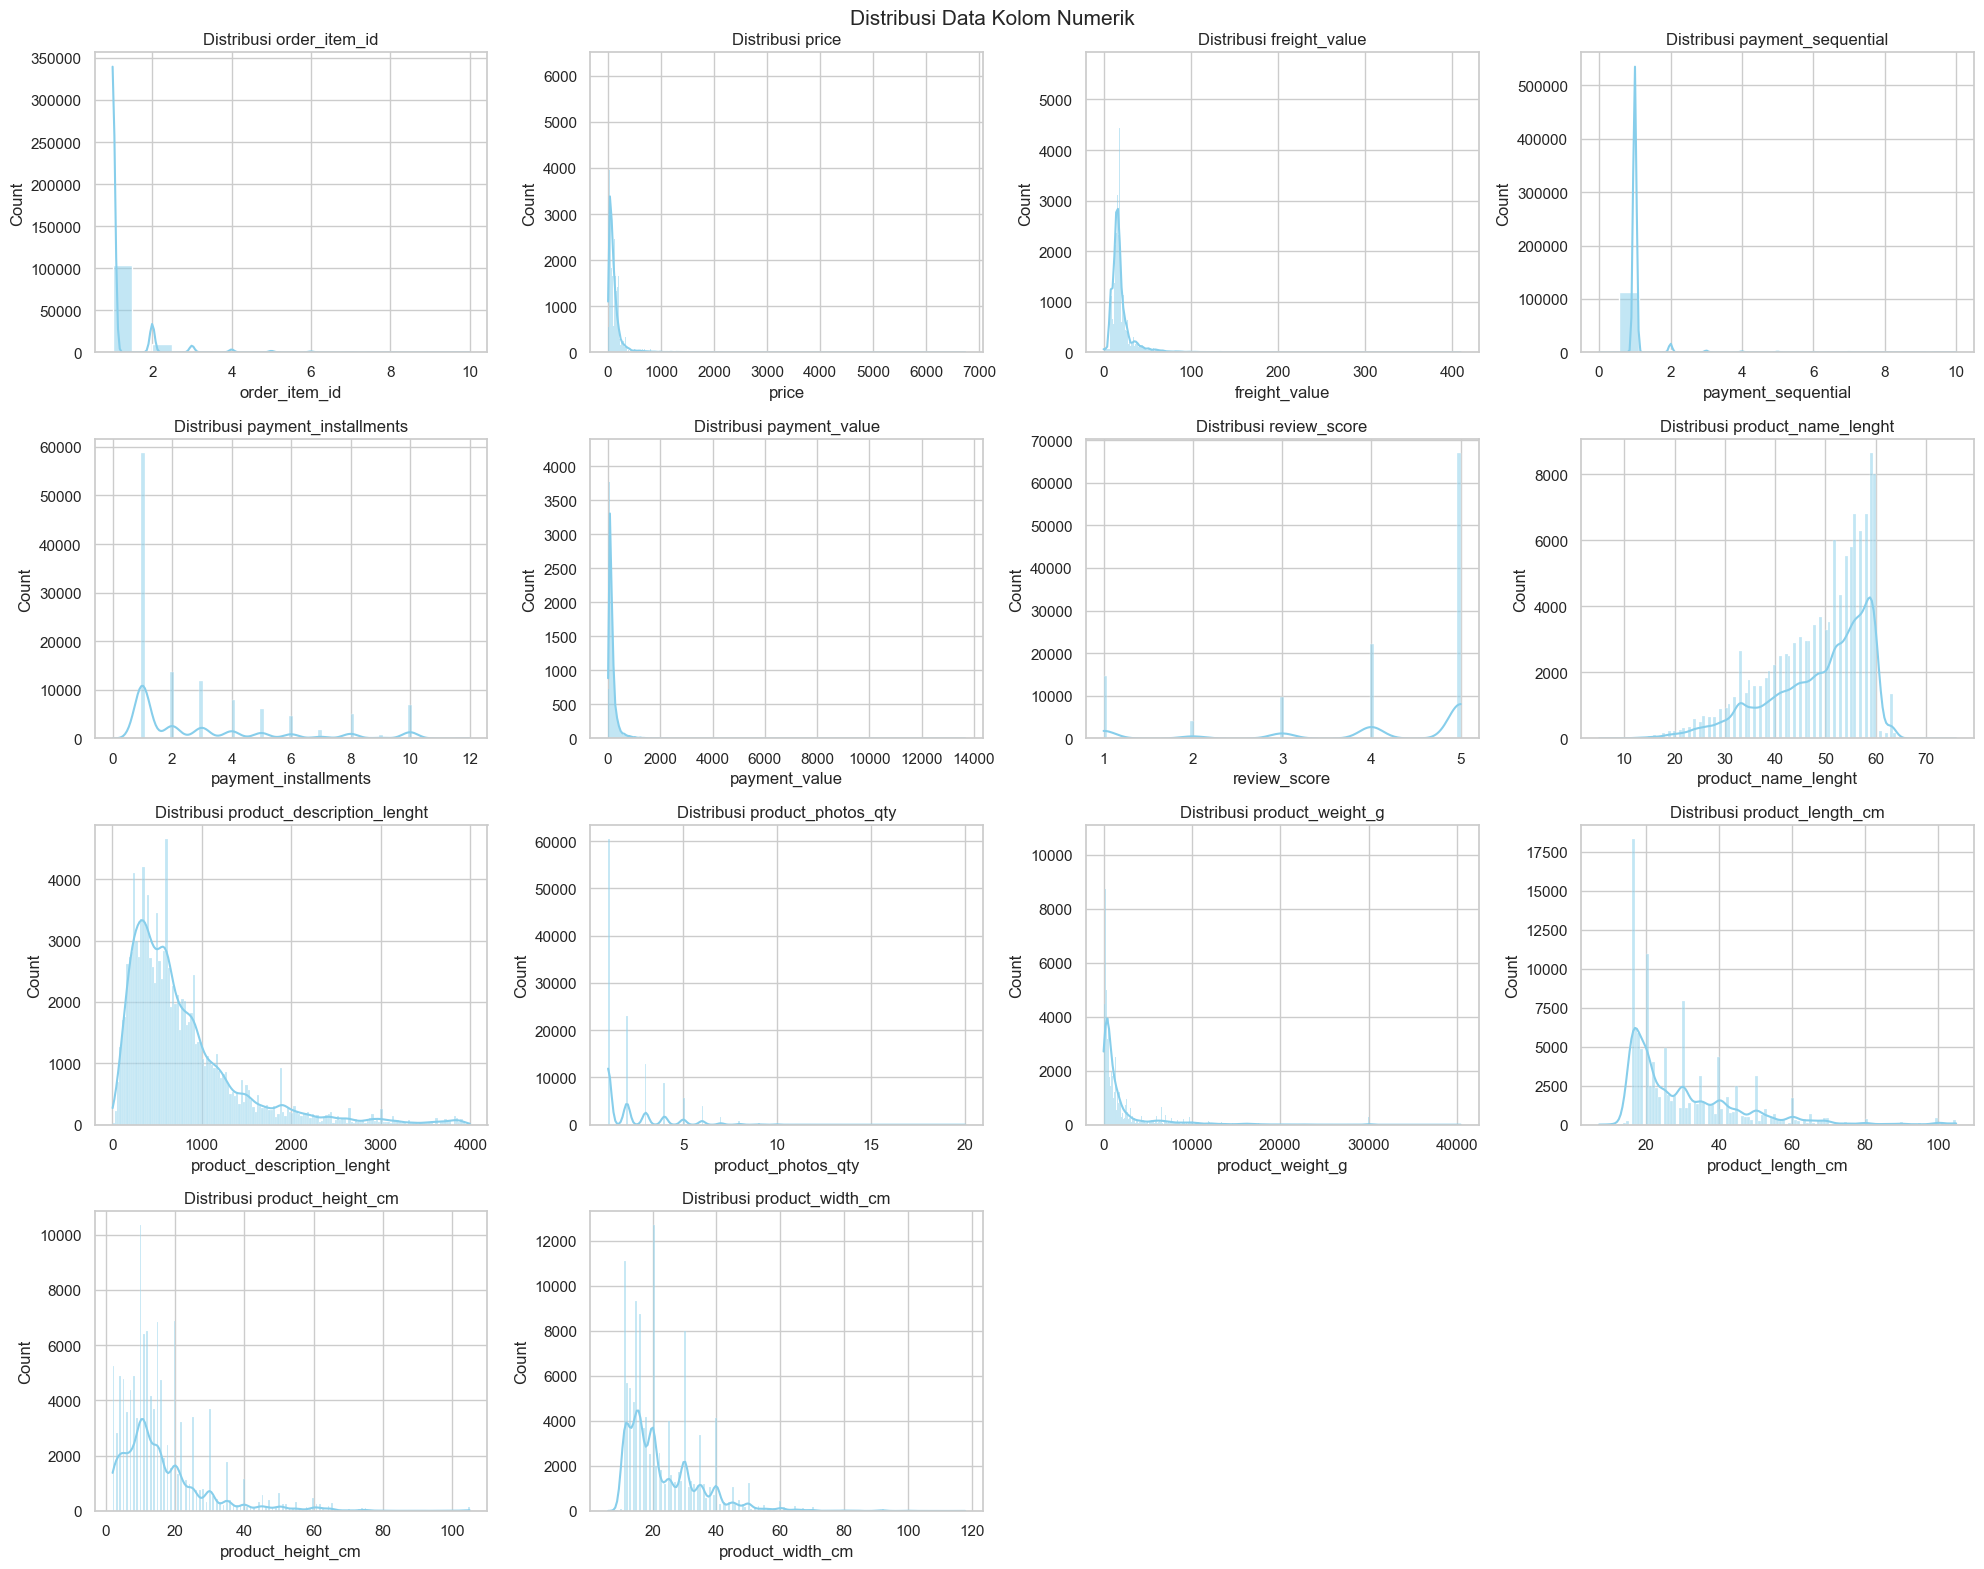

In [64]:
sns.set(style="whitegrid")

numeric_columns = main_data_df.select_dtypes(include=[np.number]).columns

num_columns = 4
num_rows = (len(numeric_columns) // num_columns) + (1 if len(numeric_columns) % num_columns != 0 else 0)
fig_hist, axes_hist = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

axes_hist = axes_hist.flatten()

for i, column in enumerate(numeric_columns[:14]):  # Batasi 14 kolom pertama
    sns.histplot(main_data_df[column], kde=True, ax=axes_hist[i], color='skyblue')
    axes_hist[i].set_title(f'Distribusi {column}')

for j in range(i + 1, len(axes_hist)):
    axes_hist[j].axis('off')

plt.suptitle('Distribusi Data Kolom Numerik', fontsize=15)
fig_hist.tight_layout()

plt.show()

Insight yang dapat diambil dari distribusi kolom numerik diatas diantaranya adalah sebagai berikut:
1. sebagian besar kolom numerik memiliki distribusi condong ke kanan, menunjukkan adanya outlier dengan nilai ekstrem, terutama pada `harga produk`, `ongkos kirim`, dan `nilai pembayaran`. 
2. Skor ulasan pelanggan terpolarisasi, dengan mayoritas memberi `rating 5 atau 1`, menandakan faktor tertentu yang memengaruhi kepuasan pelanggan.
3. `Dimensi dan berat produk` yang `bervariasi` juga berdampak pada `biaya pengiriman`, yang dalam beberapa kasus sangat tinggi. 
4. Selain itu, meskipun `mayoritas pelanggan membayar penuh`, opsi `cicilan` hingga `12 bulan` menunjukkan peluang bagi platform e-commerce untuk menarik lebih banyak pembeli. Pemahaman pola ini dapat membantu dalam strategi penjualan, pengelolaan ongkir, dan peningkatan layanan pelanggan. 

**Rentang waktu yang terdapat pada dataset**

In [65]:
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])

start_date = main_data_df['order_purchase_timestamp'].min()
end_date = main_data_df['order_purchase_timestamp'].max()

print(f"Rentang waktu dalam dataset: {start_date.strftime('%Y-%m-%d')} hingga {end_date.strftime('%Y-%m-%d')}")

Rentang waktu dalam dataset: 2016-09-04 hingga 2018-09-03


### Explore Distribusi Penjualan Jumlah Transaksi dan Revenue

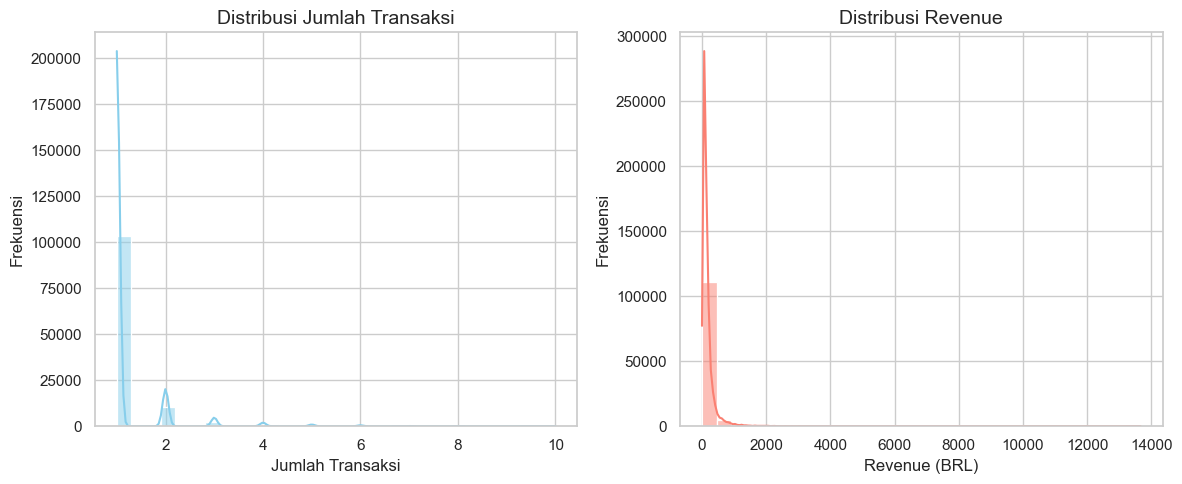

In [66]:
# Set ukuran figure
plt.figure(figsize=(12, 5))

# Plot Distribusi Jumlah Transaksi
plt.subplot(1, 2, 1)
sns.histplot(main_data_df['order_item_id'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Transaksi', fontsize=14)
plt.xlabel('Jumlah Transaksi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Plot Distribusi Revenue
plt.subplot(1, 2, 2)
sns.histplot(main_data_df['payment_value'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Revenue', fontsize=14)
plt.xlabel('Revenue (BRL)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

Dari distribusi jumlah transaksi dan revenue diatas dapat disimpulkan bahwa mayoritas pelanggan hanya membeli 1 item per transaksi, dengan jumlah transaksi yang menurun drastis seiring bertambahnya item. Revenue per transaksi cenderung kecil, tetapi terdapat beberapa transaksi bernilai sangat tinggi (outlier), yang menunjukkan bahwa sebagian kecil pelanggan berkontribusi signifikan terhadap total pendapatan. Hal ini mengindikasikan bahwa strategi pemasaran dapat difokuskan pada mendorong repeat order atau meningkatkan nilai transaksi per pembelian untuk meningkatkan revenue secara keseluruhan. 

### Explore Correlation Heatmap with All Feature

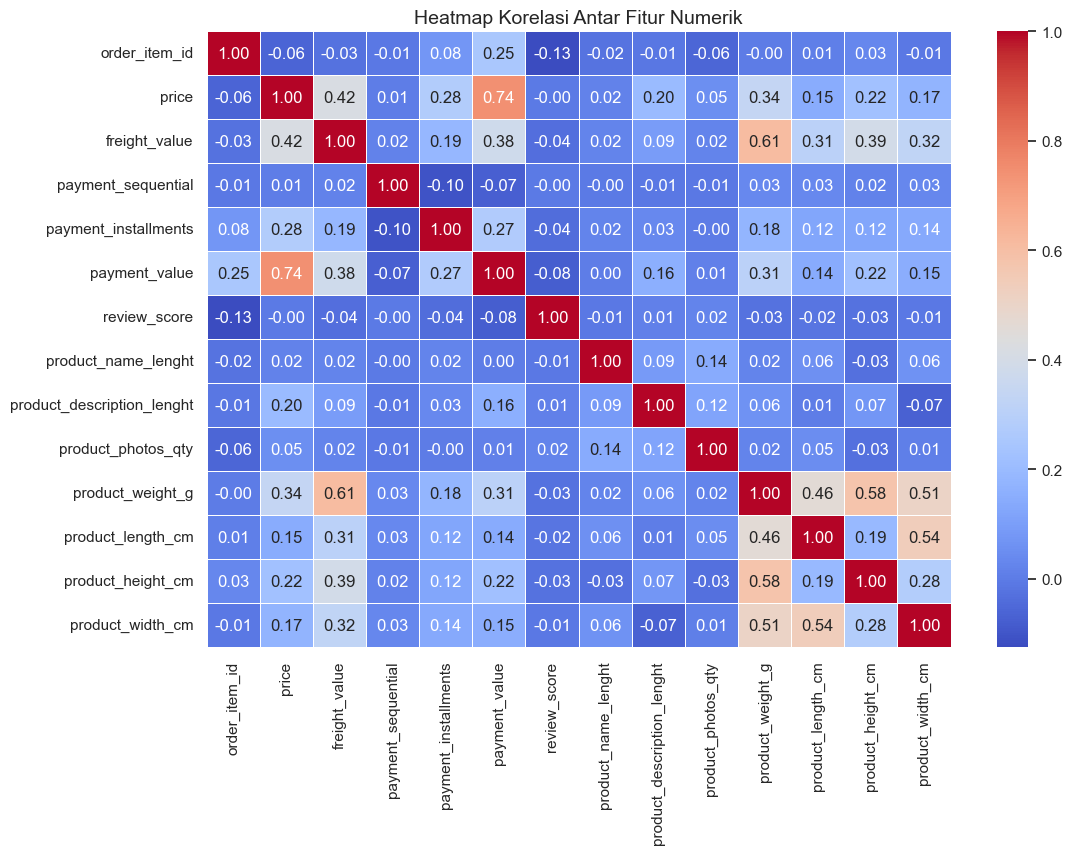

In [67]:
# Memilih hanya kolom numerik
numeric_data = main_data_df.select_dtypes(include=['number'])

# Menghitung korelasi antar fitur numerik
correlation_matrix = numeric_data.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14)
plt.show()

dalam korelasi heatmap diatas dapat diambil beberapa insight diantaranya:

1. Harga (price) & Nilai Pembayaran (payment_value) → `Korelasi: 0.74` <br> 
Produk dengan harga lebih tinggi cenderung menghasilkan nilai transaksi yang lebih besar. Ini menunjukkan bahwa strategi diskon atau cicilan bisa berpengaruh terhadap nilai transaksi total.

2. Berat Produk (product_weight_g) & Dimensi Produk (length, height, width) → `Korelasi: 0.46 - 0.58` <br>
Produk yang lebih berat cenderung memiliki ukuran yang lebih besar. Seller dapat mempertimbangkan kemasan yang lebih efisien untuk mengoptimalkan ongkos kirim.

3. Ongkos Kirim (freight_value) & Berat/DImensi Produk → Korelasi: 0.31 - 0.61 <br>
Ongkos kirim berbanding lurus dengan berat dan ukuran produk. Ini bisa menjadi faktor penentu dalam keputusan pelanggan, sehingga subsidi ongkir atau promo bisa menjadi strategi efektif.

4. Harga (price) & Berat/DImensi Produk → `Korelasi: 0.15 - 0.34` <br>
Produk dengan harga lebih tinggi cenderung lebih besar atau lebih berat, tetapi tidak selalu signifikan. Hal ini bisa menjadi pertimbangan dalam menentukan kategori premium atau eksklusif.

5. Skor Ulasan (review_score) & Semua Variabel Numerik → `Korelasi ≈ 0`
Skor ulasan tidak memiliki hubungan kuat dengan fitur numerik seperti harga, dimensi, atau ongkos kirim. Ini menunjukkan bahwa kepuasan pelanggan lebih dipengaruhi oleh faktor non-numerik, seperti layanan pelanggan atau kualitas produk.

Korelasi yang tinggi antara harga dan nilai transaksi menunjukkan bahwa strategi harga memainkan peran penting dalam penjualan. Selain itu, biaya pengiriman yang berkaitan dengan berat dan dimensi produk menjadi faktor yang perlu dikelola dengan baik. Sementara itu, skor ulasan tidak banyak dipengaruhi oleh faktor numerik, sehingga seller harus lebih fokus pada aspek pengalaman pelanggan untuk meningkatkan kepuasan dan loyalitas pelanggan.

### Explore Descriptive Kolom Categorical

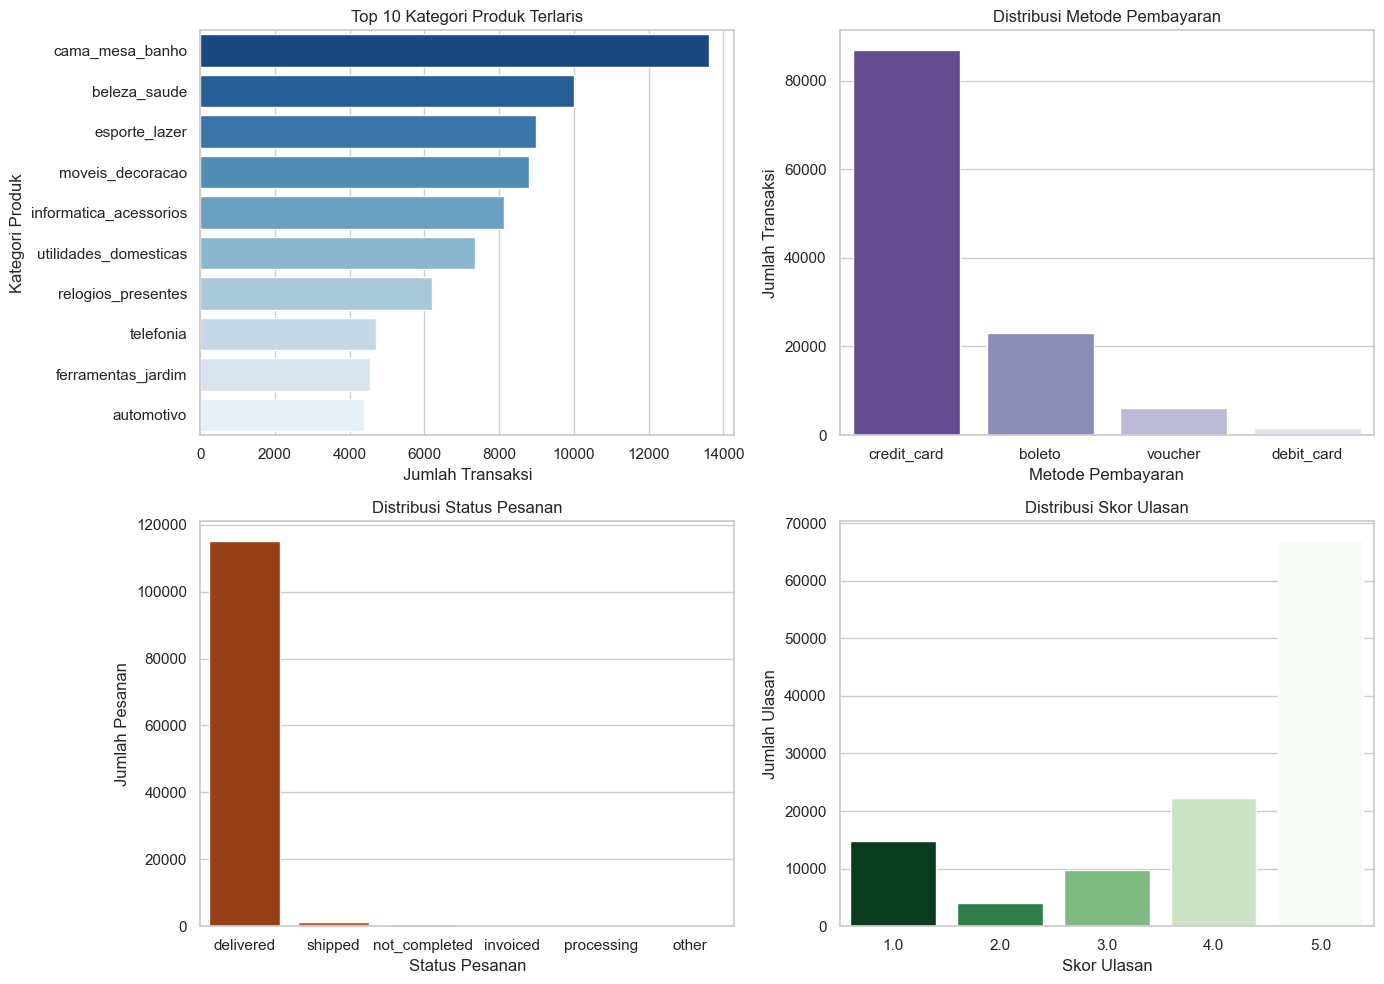

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

top_categories = main_data_df['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette="Blues_r", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Top 10 Kategori Produk Terlaris")
axes[0, 0].set_xlabel("Jumlah Transaksi")
axes[0, 0].set_ylabel("Kategori Produk")

payment_methods = main_data_df['payment_type'].value_counts()
sns.barplot(x=payment_methods.index, y=payment_methods.values, hue=payment_methods.index, palette="Purples_r", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Metode Pembayaran")
axes[0, 1].set_xlabel("Metode Pembayaran")
axes[0, 1].set_ylabel("Jumlah Transaksi")

order_status = main_data_df['order_status'].value_counts()
sns.barplot(x=order_status.index, y=order_status.values, hue=order_status.index, palette="Oranges_r", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Status Pesanan")
axes[1, 0].set_xlabel("Status Pesanan")
axes[1, 0].set_ylabel("Jumlah Pesanan")

review_scores = main_data_df['review_score'].value_counts().sort_index()
sns.barplot(x=review_scores.index, y=review_scores.values, hue=review_scores.index, palette="Greens_r", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Skor Ulasan")
axes[1, 1].set_xlabel("Skor Ulasan")
axes[1, 1].set_ylabel("Jumlah Ulasan")

plt.tight_layout()
plt.show()

Kategori `cama mesa banho` menjadi produk **`terlaris`**, menunjukkan tingginya permintaan untuk perlengkapan rumah tangga. Mayoritas pelanggan menggunakan **`kartu kredit`** sebagai metode pembayaran, menandakan preferensi terhadap kemudahan transaksi. Status pesanan didominasi oleh **`delivered`**, mencerminkan efisiensi dalam proses pengiriman. Dari segi kepuasan pelanggan, sebagian besar ulasan berada di skor `5 dan 4`, menunjukkan pengalaman belanja yang positif, meskipun masih ada pelanggan yang memberikan skor rendah.

## Visualization & Explanatory Analysis

### Pertanyaan Bisnis

1. Produk kategori apa yang mengalami peningkatan penjualan paling signifikan dalam `6 bulan` terakhir **(Maret 2018)**?

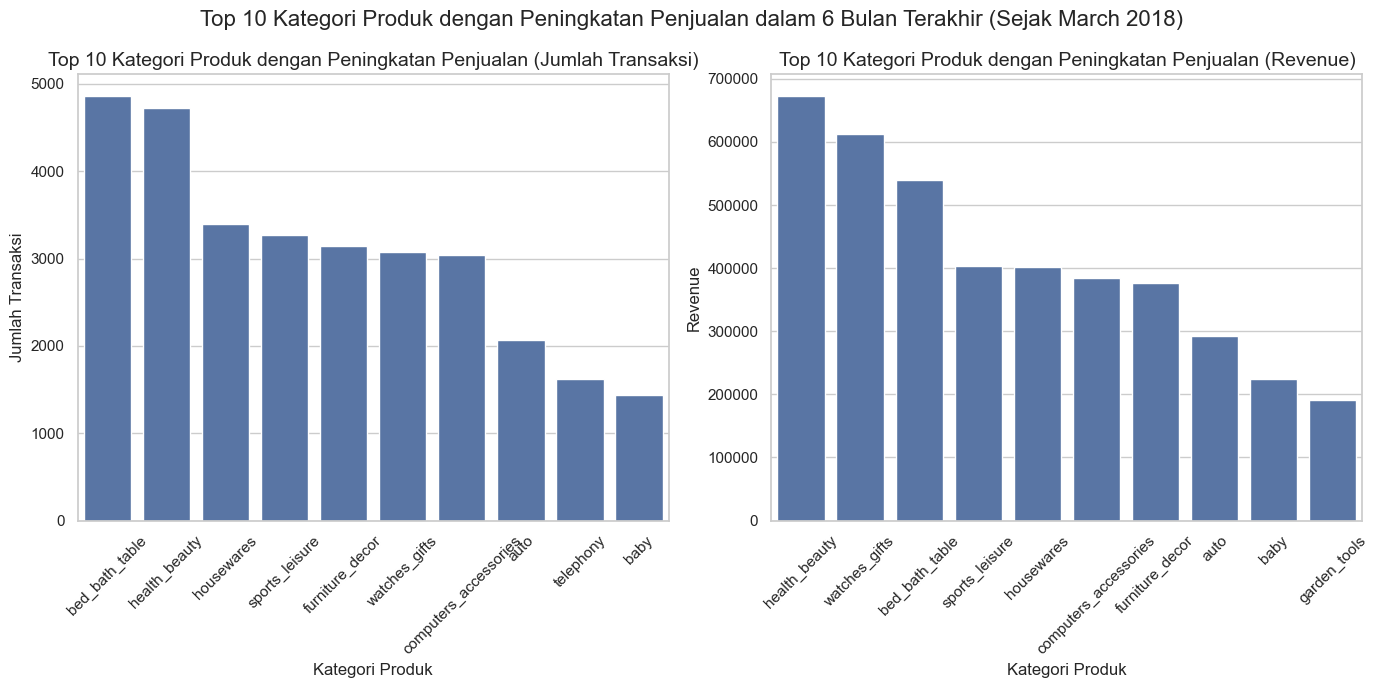

In [69]:
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])
latest_date = main_data_df['order_purchase_timestamp'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

recent_sales_data = main_data_df.loc[main_data_df['order_purchase_timestamp'] >= six_months_ago].copy()
recent_sales_data.loc[:, 'revenue'] = recent_sales_data['price'] * recent_sales_data['order_item_id']

category_sales = recent_sales_data['product_category_name_english'].value_counts()
category_revenue = recent_sales_data.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.head(10).index, y=category_sales.head(10).values)
plt.title('Top 10 Kategori Produk dengan Peningkatan Penjualan (Jumlah Transaksi)', fontsize=14)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=category_revenue.head(10).index, y=category_revenue.head(10).values)
plt.title('Top 10 Kategori Produk dengan Peningkatan Penjualan (Revenue)', fontsize=14)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)

plt.suptitle(f'Top 10 Kategori Produk dengan Peningkatan Penjualan dalam 6 Bulan Terakhir (Sejak {six_months_ago.strftime("%B %Y")})', fontsize=16)
plt.tight_layout()
plt.show()

Dalam 6 bulan terakhir (sejak Maret 2018), terjadi peningkatan signifikan dalam penjualan beberapa kategori produk, baik dari segi jumlah transaksi maupun pendapatan (revenue). Analisis ini membantu mengidentifikasi tren pasar dan memberikan wawasan strategis bagi bisnis.

1. **`Peningkatan Berdasarkan Jumlah Transaksi`** <br>
Kategori "bed_bath_table" (perlengkapan tempat tidur, meja, dan mandi) mengalami peningkatan transaksi paling tinggi, dengan hampir 5.000 transaksi. Hal ini menunjukkan bahwa produk dalam kategori ini semakin diminati pelanggan. "health_beauty" (kecantikan dan kesehatan) berada di posisi kedua dengan sekitar 4.700 transaksi, diikuti oleh "housewares" (peralatan rumah tangga) dengan sekitar 3.400 transaksi.

2. **`Peningkatan Berdasarkan Pendapatan (Revenue)`** <br>
Dari segi pendapatan, kategori "health_beauty" menghasilkan revenue tertinggi, mencapai hampir 700.000 BRL. Hal ini menunjukkan bahwa meskipun jumlah transaksinya sedikit lebih rendah dibandingkan "bed_bath_table", nilai transaksi per unit produk lebih tinggi. Kategori "bed_bath_table" berada di posisi kedua dengan 620.000 BRL, sementara "watches_gifts" (jam tangan dan hadiah) berada di posisi ketiga dengan 540.000 BRL.

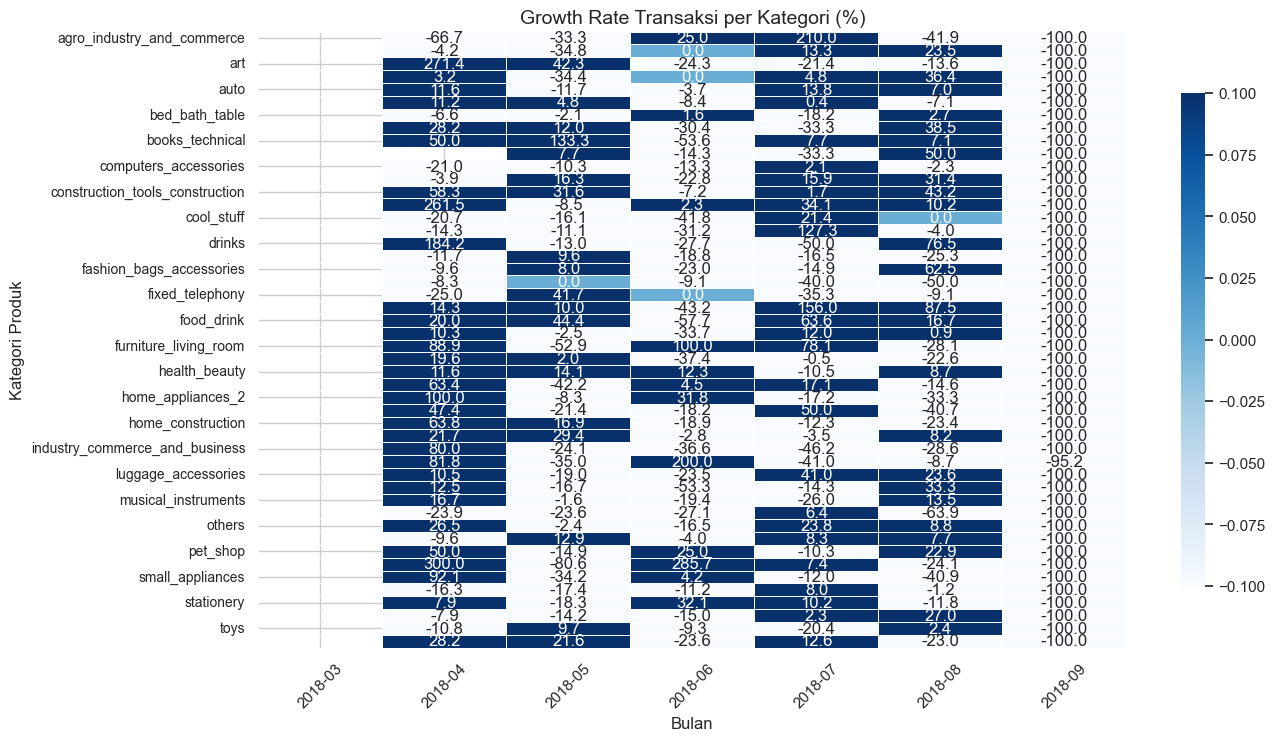

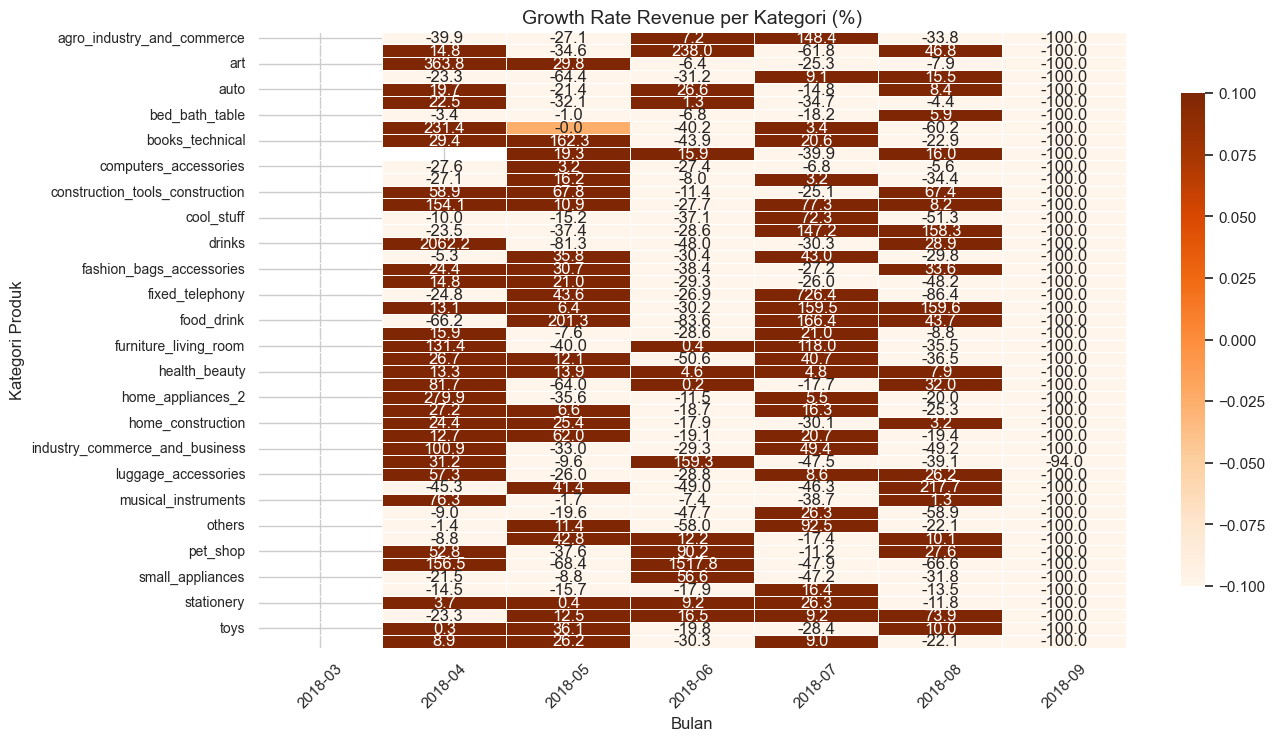

In [70]:
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])
latest_date = main_data_df['order_purchase_timestamp'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

recent_sales_data = main_data_df.loc[main_data_df['order_purchase_timestamp'] >= six_months_ago].copy()
recent_sales_data['revenue'] = recent_sales_data['price'] * recent_sales_data['order_item_id']

recent_sales_data['month'] = recent_sales_data['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = recent_sales_data.groupby(['month', 'product_category_name_english']).size().unstack(fill_value=0)
monthly_revenue = recent_sales_data.groupby(['month', 'product_category_name_english'])['revenue'].sum().unstack(fill_value=0)

monthly_sales_growth = monthly_sales.pct_change().multiply(100)
monthly_revenue_growth = monthly_revenue.pct_change().multiply(100)

plt.figure(figsize=(14, 8))
sns.heatmap(
    monthly_sales_growth.T, 
    cmap='Blues', 
    annot=True, 
    fmt=".1f", 
    linewidths=0.5,  # Biar ada pemisah antar sel
    cbar_kws={'shrink': 0.8}  # Atur ukuran colorbar
)
plt.title("Growth Rate Transaksi per Kategori (%)", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.xticks(rotation=45)  # Rotasi biar gak dempet
plt.yticks(fontsize=10)  # Atur ukuran font kategori
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(
    monthly_revenue_growth.T, 
    cmap='Oranges', 
    annot=True, 
    fmt=".1f", 
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Growth Rate Revenue per Kategori (%)", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

Dalam 6 bulan terakhir (Maret 2018 - Agustus 2018), analisis tingkat pertumbuhan transaksi per kategori produk menunjukkan pola perubahan penjualan yang signifikan. Grafik di atas memberikan gambaran tentang growth rate (%) transaksi untuk setiap kategori, dengan warna biru mewakili pertumbuhan positif dan warna putih menunjukkan penurunan. Semakin gelap warna biru, semakin tinggi tingkat pertumbuhan transaksi. 

analisis tingkat pertumbuhan pendapatan (revenue) per kategori produk memberikan wawasan penting tentang tren penjualan. Grafik heatmap di atas menggambarkan growth rate (%) revenue, dengan warna oranye gelap menunjukkan pertumbuhan tinggi dan warna putih menunjukkan penurunan.

**`Analisis Pertumbuhan Transaksi per Kategori`** <br>
Beberapa kategori menunjukkan lonjakan pertumbuhan transaksi pada bulan tertentu, namun tidak semuanya memiliki tren yang stabil.
Jika melihat kategori dengan peningkatan penjualan paling signifikan secara keseluruhan, maka "bed_bath_table" menjadi kandidat utama karena menunjukkan tren pertumbuhan yang lebih stabil dibandingkan kategori lain. Hal ini mengindikasikan bahwa permintaan untuk produk dalam kategori ini meningkat secara bertahap dan berkelanjutan, bukan hanya terjadi pada bulan tertentu saja.

**`Analisis Tingkat Pertumbuhan Pendapatan (revenue)`** <br>
Kategori "bed_bath_table" menunjukkan pertumbuhan pendapatan paling signifikan dan konsisten dalam 6 bulan terakhir, berbeda dengan kategori lain yang mengalami lonjakan sesaat. Tren ini bisa dimanfaatkan dengan meningkatkan stok, promosi, dan optimalisasi logistik untuk mempertahankan momentum pertumbuhan dan meningkatkan penjualan. 

**Insight Pertanyaan Bisnis 1: Peningkatan Penjualan dalam 6 Bulan Terakhir (Maret 2018 - Agustus 2018)**
1. Kategori "bed_bath_table" Mengalami Pertumbuhan Transaksi Paling Signifikan <br>
Dengan hampir 5.000 transaksi, kategori ini menunjukkan peningkatan yang stabil dibandingkan kategori lain.
2. "health_beauty" Memimpin dalam Pendapatan (Revenue) dengan Produk Bernilai Tinggi <br>
Meskipun jumlah transaksinya lebih rendah, kategori ini menghasilkan hampir 700.000 BRL, menunjukkan harga rata-rata produk yang lebih tinggi.
3. Tren Penjualan yang Stabil Perlu Didukung dengan Optimalisasi Logistik & Customer Experience <br>
Kategori "bed_bath_table" menunjukkan pertumbuhan yang konsisten, bukan sekadar lonjakan sesaat.


**Rekomendasi Bisnis:**
1. Pastikan stok selalu tersedia, analisis produk paling laku, dan gunakan teknik upselling & cross-selling dengan kategori terkait seperti housewares.
2. Fokus pada premium branding, tawarkan diskon bundling, dan gunakan iklan digital personalisasi untuk meningkatkan daya tarik produk.
3. Tingkatkan promosi jangka panjang, percepat pengiriman, dan analisis ulasan pelanggan untuk meningkatkan kepuasan serta loyalitas pembeli.

2. Berapa rata-rata waktu pengiriman yang dilakukan oleh seller dalam `6 bulan` terakhir?

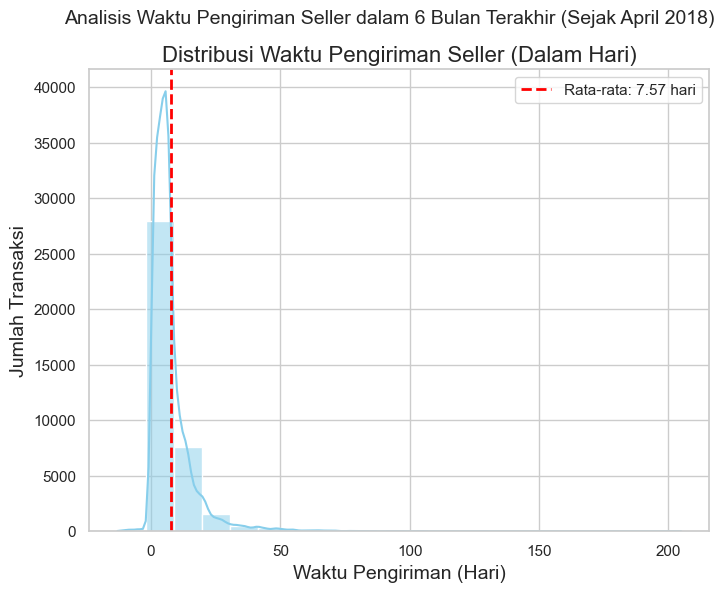

📌 Rata-rata waktu pengiriman dalam 6 bulan terakhir (April 2018 - October 2018) adalah: 7.57 hari


In [71]:
main_data_df['order_delivered_carrier_date'] = pd.to_datetime(main_data_df['order_delivered_carrier_date'])
main_data_df['order_delivered_customer_date'] = pd.to_datetime(main_data_df['order_delivered_customer_date'])

latest_date = main_data_df['order_delivered_customer_date'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

recent_shipping_data = main_data_df.loc[main_data_df['order_delivered_customer_date'] >= six_months_ago].copy()
recent_shipping_data.loc[:, 'shipping_time'] = (recent_shipping_data['order_delivered_customer_date'] - 
                                                recent_shipping_data['order_delivered_carrier_date']).dt.days

avg_shipping_time = recent_shipping_data['shipping_time'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(recent_shipping_data['shipping_time'], kde=True, bins=20, color='skyblue')
plt.axvline(avg_shipping_time, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {avg_shipping_time:.2f} hari')
plt.legend()
plt.title('Distribusi Waktu Pengiriman Seller (Dalam Hari)', fontsize=16)
plt.xlabel('Waktu Pengiriman (Hari)', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.suptitle(f'Analisis Waktu Pengiriman Seller dalam 6 Bulan Terakhir (Sejak {six_months_ago.strftime("%B %Y")})', fontsize=14)
plt.show()

print(f'📌 Rata-rata waktu pengiriman dalam 6 bulan terakhir ({six_months_ago.strftime("%B %Y")} - {latest_date.strftime("%B %Y")}) adalah: {avg_shipping_time:.2f} hari')

Grafik distribusi waktu pengiriman seller dalam 6 bulan terakhir menunjukkan bahwa mayoritas transaksi dikirim dalam waktu singkat, dengan rata-rata **`7,57 hari`**. Namun, terdapat beberapa transaksi dengan waktu pengiriman yang jauh lebih lama (lebih dari 100 hari), menunjukkan adanya tantangan dalam logistik atau ketersediaan stok. Optimalisasi proses pengiriman diperlukan untuk mengurangi variabilitas dan meningkatkan kepuasan pelanggan.

**Insight Pertanyaan Bisnis 2: rata-rata waktu pengiriman yang dilakukan oleh seller dalam `6 bulan` terakhir**
1.  Mayoritas Pesanan Dikirim dalam Waktu ±7,57 Hari, tetapi Ada Variasi Ekstrem <br>
Sebagian besar transaksi dikirim dalam waktu yang relatif cepat, tetapi ada beberapa kasus pengiriman yang mencapai >100 hari.

2. Ketidakstabilan Waktu Pengiriman Dapat Mempengaruhi Kepuasan Pelanggan <br>
Pelanggan cenderung lebih puas dengan pengiriman yang tepat waktu dan konsisten dibandingkan yang terlalu bervariasi.

3. Optimasi Logistik & Stok Dapat Mengurangi Variabilitas Pengiriman <br>
Tantangan utama kemungkinan berasal dari ketersediaan stok, efisiensi gudang, atau layanan ekspedisi.

**Rekomendasi Bisnis:**
1. Lakukan monitoring ketat terhadap seller dengan waktu pengiriman ekstrem, serta identifikasi penyebab keterlambatan (misalnya, masalah stok atau logistik).<br>

2. Terapkan SLA (Service Level Agreement) dengan seller untuk memastikan standar pengiriman dan berikan insentif bagi seller yang memenuhi target waktu pengiriman. <br>

3. Gunakan data analitik untuk memprediksi permintaan stok, optimalkan kerja sama dengan jasa pengiriman, dan pertimbangkan program "Fast Shipping" bagi seller terbaik untuk meningkatkan daya saing di marketplace.

**Kesimpulan Insight Bisnis dari pertanyaan bisnis 1 & 2:** <br>
Berdasarkan analisis dalam 6 bulan terakhir (Maret 2018 - Agustus 2018), ditemukan dua faktor utama yang berpengaruh terhadap pertumbuhan bisnis: kategori produk dengan peningkatan penjualan tertinggi dan efisiensi waktu pengiriman seller.

1. Peluang besar untuk meningkatkan strategi pemasaran, stok, dan optimasi promosi di kategori ini agar dapat mempertahankan pertumbuhan dan meningkatkan revenue. <br>
2. Seller dan marketplace perlu memperbaiki sistem logistik, memastikan stok tersedia, dan meningkatkan kepastian waktu pengiriman untuk meningkatkan kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

### Metode RFM (Recency, Frequency, Monetary) 
Melakukan analisi lanjutan menggunakan metode RFM dimana bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
1. **`Recency:`** Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
2. **`Frequency:`** Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
3. **`Monetary:`** Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [72]:
df = main_data_df.copy()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

reference_date = df['order_purchase_timestamp'].max()

rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


Melihat distribusi dari recency, frequency dan monetary

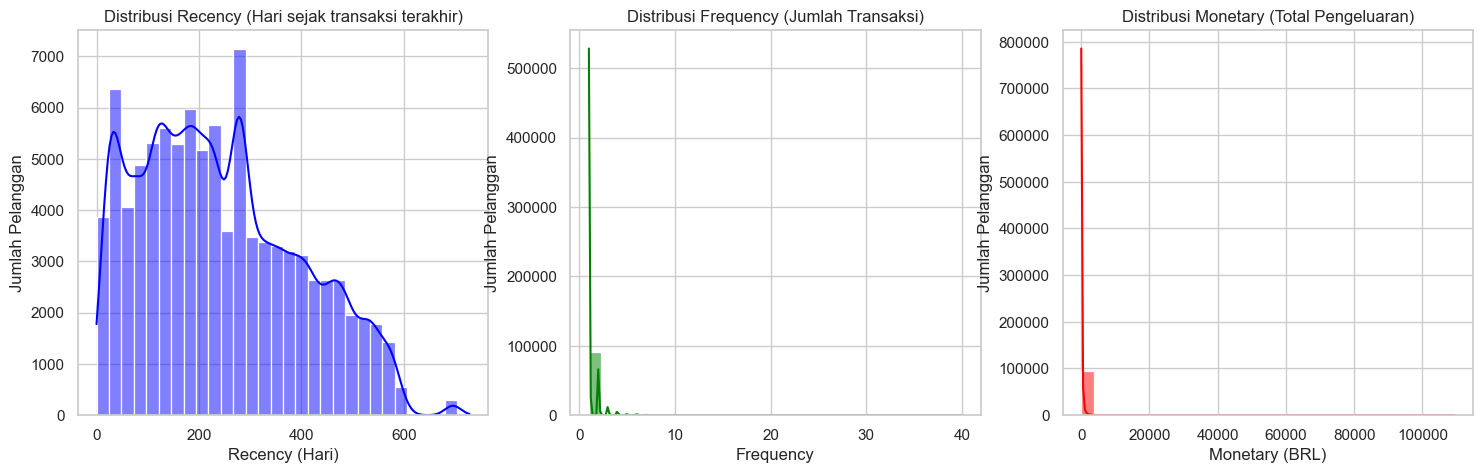

In [73]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='blue')
plt.title('Distribusi Recency (Hari sejak transaksi terakhir)')
plt.xlabel('Recency (Hari)')
plt.ylabel('Jumlah Pelanggan')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='green')
plt.title('Distribusi Frequency (Jumlah Transaksi)')
plt.xlabel('Frequency')
plt.ylabel('Jumlah Pelanggan')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='red')
plt.title('Distribusi Monetary (Total Pengeluaran)')
plt.xlabel('Monetary (BRL)')
plt.ylabel('Jumlah Pelanggan')

plt.show()

1. Distribusi RFM menunjukkan bahwa sebagian besar pelanggan adalah pelanggan baru yang hanya melakukan satu kali transaksi dengan nilai pembelian yang rendah.
2. Hal ini mengindikasikan potensi masalah dalam retensi pelanggan dan loyalitas pelanggan.
3. Perlu dilakukan upaya untuk meningkatkan retensi pelanggan, mendorong pembelian berulang, dan meningkatkan nilai pembelian pelanggan.

Analisis RFM ini sangat berguna untuk melakukan segmentasi pelanggan. Dengan data ini, perusahaan dapat membuat kelompok pelanggan berdasarkan perilaku pembelian mereka.

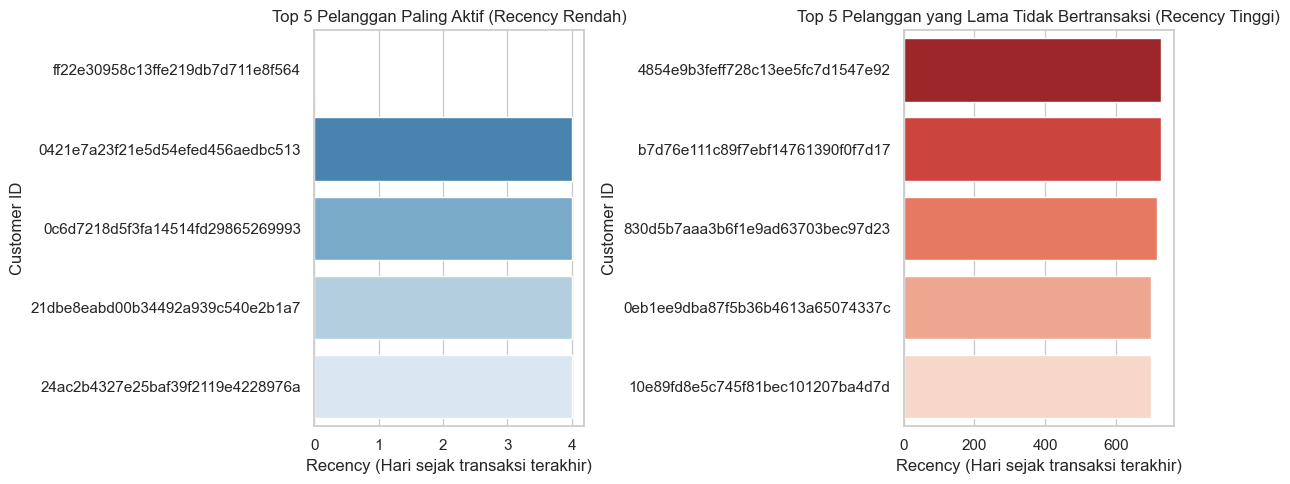

In [74]:
top_recency = rfm.nsmallest(5, 'Recency')
worst_recency = rfm.nlargest(5, 'Recency')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(y=top_recency['customer_unique_id'], x=top_recency['Recency'], hue=top_recency['customer_unique_id'], dodge=False, palette="Blues_r", legend=False)
plt.title('Top 5 Pelanggan Paling Aktif (Recency Rendah)')
plt.xlabel('Recency (Hari sejak transaksi terakhir)')
plt.ylabel('Customer ID')

plt.subplot(1, 2, 2)
sns.barplot(y=worst_recency['customer_unique_id'], x=worst_recency['Recency'], hue=worst_recency['customer_unique_id'], dodge=False, palette="Reds_r", legend=False)
plt.title('Top 5 Pelanggan yang Lama Tidak Bertransaksi (Recency Tinggi)')
plt.xlabel('Recency (Hari sejak transaksi terakhir)')
plt.ylabel('Customer ID')

plt.tight_layout()
plt.show()

Pelanggan dengan Recency terendah adalah mereka yang baru saja melakukan transaksi, sedangkan pelanggan dengan Recency tertinggi sudah lama tidak berbelanja. <br>

1. Pelanggan dengan Recency rendah menunjukkan pelanggan yang masih aktif dan mungkin perlu diberikan penawaran eksklusif agar terus berbelanja.
2. Pelanggan dengan Recency tinggi berisiko churn (tidak kembali belanja), sehingga perlu strategi retargeting atau promosi khusus.

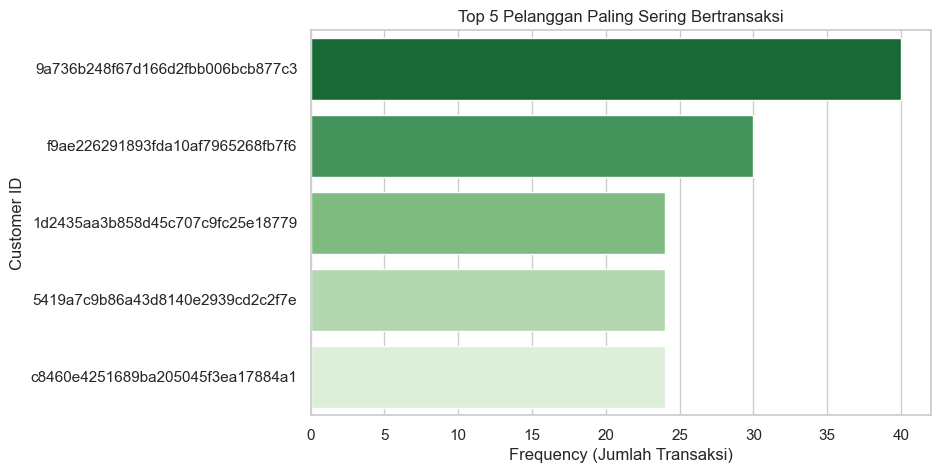

In [75]:
top_frequency = rfm.nlargest(5, 'Frequency')

plt.figure(figsize=(8, 5))
sns.barplot(y=top_frequency['customer_unique_id'], x=top_frequency['Frequency'], hue=top_frequency['customer_unique_id'], dodge=False, palette="Greens_r", legend=False)
plt.title('Top 5 Pelanggan Paling Sering Bertransaksi')
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Customer ID')
plt.show()

Pelanggan dengan Frequency tertinggi adalah mereka yang paling sering berbelanja dalam periode tertentu. Pelanggan ini sangat loyal terhadap marketplace dan mungkin layak mendapatkan VIP treatment, seperti program membership atau diskon eksklusif.

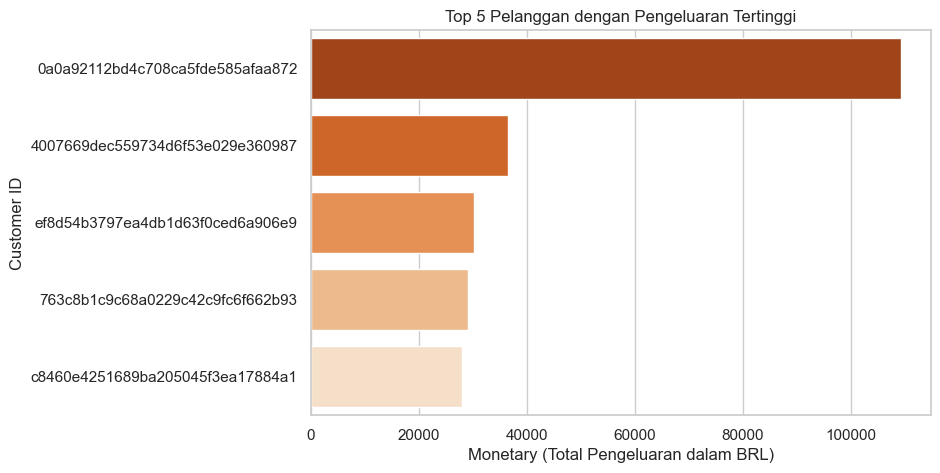

In [76]:
top_monetary = rfm.nlargest(5, 'Monetary')

plt.figure(figsize=(8, 5))
sns.barplot(y=top_monetary['customer_unique_id'], x=top_monetary['Monetary'], hue=top_monetary['customer_unique_id'], dodge=False, palette="Oranges_r", legend=False)
plt.title('Top 5 Pelanggan dengan Pengeluaran Tertinggi')
plt.xlabel('Monetary (Total Pengeluaran dalam BRL)')
plt.ylabel('Customer ID')
plt.show()

Pelanggan dengan Monetary tertinggi adalah mereka yang telah mengeluarkan total belanja paling besar dalam periode tertentu. Pelanggan ini adalah big spenders dan berpotensi menjadi brand ambassadors jika diberikan pelayanan khusus, seperti cashback eksklusif atau program referral untuk mengajak lebih banyak pelanggan.


**Insight RFM Analysis**:
1. Sebagian besar pelanggan hanya melakukan satu kali transaksi dengan nilai pembelian yang rendah
Berdasarkan Frequency dan Monetary, mayoritas pelanggan hanya bertransaksi sekali dengan pengeluaran yang tidak terlalu besar. Hal ini menunjukkan bahwa banyak pelanggan tidak kembali untuk berbelanja ulang, yang berisiko menurunkan Customer Lifetime Value (CLV) bisnis dalam jangka panjang.

2. Banyak pelanggan yang tidak aktif dalam jangka waktu lama (Recency tinggi), berisiko churn
Analisis Recency menunjukkan bahwa sejumlah besar pelanggan sudah lama tidak melakukan transaksi, menandakan rendahnya tingkat retensi pelanggan. Jika tidak ada strategi untuk menarik mereka kembali, bisnis bisa kehilangan pelanggan potensial secara permanen.

3. Pelanggan terbaik memiliki transaksi berulang dan pengeluaran tinggi
Sebagian kecil pelanggan memiliki Frequency tinggi dan Monetary yang besar, menjadikannya sebagai loyal customers atau big spenders. Pelanggan ini memiliki nilai tinggi bagi bisnis dan perlu dipertahankan dengan strategi khusus agar tetap setia berbelanja.

**Rekomendasi:**:
1. Strategi untuk Pelanggan Baru & Jarang Bertransaksi (Recency & Frequency rendah)
    - Terapkan program diskon untuk pembelian kedua agar pelanggan baru kembali melakukan transaksi.

2. Strategi untuk Meningkatkan Loyalitas & Retensi Pelanggan
    - Buat program loyalitas dengan reward poin untuk pelanggan yang sering bertransaksi.
    - Tawarkan membership eksklusif dengan keuntungan seperti diskon tambahan, cashback, atau gratis ongkir.

3. Strategi untuk Pelanggan dengan Pengeluaran Tinggi (Monetary tinggi & Frequency tinggi)
    - Berikan VIP treatment, seperti early access ke produk baru atau promo khusus big spenders.
    - Libatkan mereka dalam program referral untuk menarik pelanggan baru dengan insentif eksklusif.

### Menggunakan Metode Clustering tanpa Machine Learning (Manual Grouping & Binning)
Karena tidak menggunakan algoritma Machine Learning akan dibagi pelanggan ke dalam kelompok. Akan dibagi Recency, Frequency, dan Monetary ke dalam tiga kelompok `(Low, Medium, High)` untuk memudahkan analisis.

In [77]:
rfm['Recency_Score'] = pd.cut(rfm['Recency'], bins=3, labels=['High', 'Medium', 'Low'])
rfm['Frequency_Score'] = pd.cut(rfm['Frequency'], bins=3, labels=['Low', 'Medium', 'High'])
rfm['Monetary_Score'] = pd.cut(rfm['Monetary'], bins=3, labels=['Low', 'Medium', 'High'])

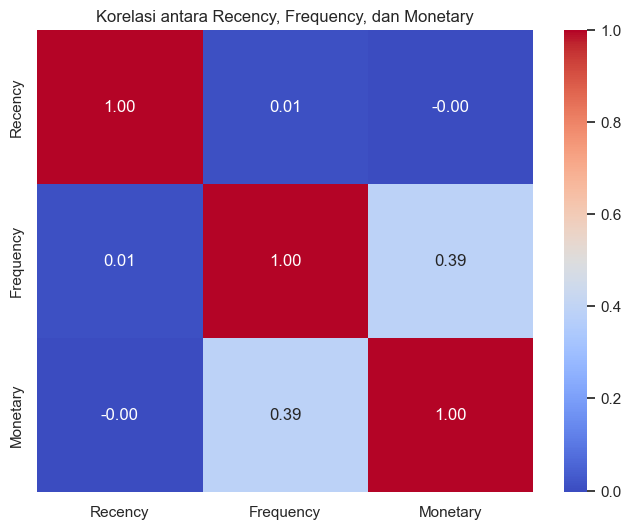

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Recency, Frequency, dan Monetary")
plt.show()

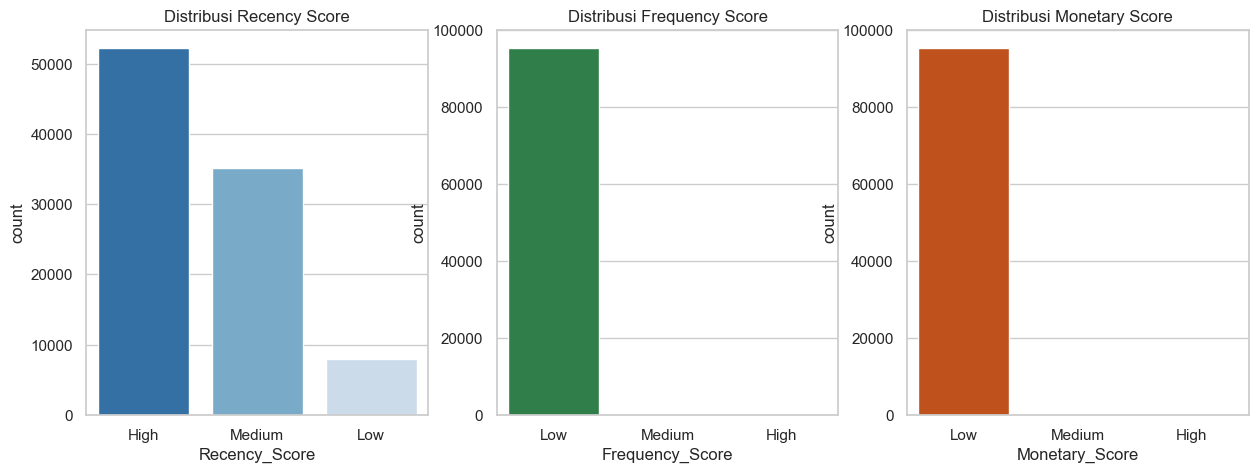

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=rfm['Recency_Score'], hue=rfm['Recency_Score'], palette="Blues_r", legend=False)
plt.title('Distribusi Recency Score')

plt.subplot(1, 3, 2)
sns.countplot(x=rfm['Frequency_Score'], hue=rfm['Frequency_Score'], palette="Greens_r", legend=False)
plt.title('Distribusi Frequency Score')

plt.subplot(1, 3, 3)
sns.countplot(x=rfm['Monetary_Score'], hue=rfm['Monetary_Score'], palette="Oranges_r", legend=False)
plt.title('Distribusi Monetary Score')

plt.show()

1. Sebagian besar pelanggan (52.000) baru saja melakukan pembelian, tetapi hanya sekali dan dengan nilai transaksi yang rendah.
2. Hampir 100.000 pelanggan hanya belanja sekali dengan nilai transaksi kecil, menunjukkan rendahnya loyalitas pelanggan.
3. Pelanggan dengan transaksi berulang (frekuensi tinggi) dan nilai belanja besar sangat sedikit, menandakan kesulitan dalam retensi pelanggan dan peningkatan nilai pembelian.

## Conclusion

**Pertanyaan Bisnis 1: Produk kategori apa yang mengalami peningkatan penjualan paling signifikan dalam `6 bulan` terakhir?** <br><br>
Dalam enam bulan terakhir, kategori **`bed_bath_table`** mengalami peningkatan transaksi paling signifikan, mencapai hampir `5.000 transaksi`. Hal ini menunjukkan tren pertumbuhan yang stabil dan permintaan yang meningkat untuk produk dalam kategori ini. Sementara itu, kategori **`health_beauty`** menghasilkan pendapatan tertinggi, hampir mencapai `700.000 BRL`, meskipun jumlah transaksinya lebih rendah dibandingkan **`bed_bath_table`**. Hal ini mengindikasikan bahwa produk dalam kategori `kecantikan dan kesehatan` memiliki harga rata-rata yang lebih tinggi dan tetap diminati pelanggan. 

Untuk mempertahankan momentum pertumbuhan ini, penting bagi bisnis untuk mengoptimalkan stok produk, menerapkan strategi pemasaran seperti `upselling dan cross-selling`, serta meningkatkan layanan pengiriman guna mempercepat distribusi barang. Selain itu, promosi yang lebih personal melalui iklan digital dapat membantu menarik lebih banyak pelanggan dan meningkatkan volume transaksi. <br><br>

**Pertanyaan Bisnis 2: Berapa rata-rata waktu pengiriman yang dilakukan oleh seller dalam `6 bulan` terakhir?** <br><br>
Analisis terhadap waktu pengiriman dalam enam bulan terakhir menunjukkan bahwa sebagian besar pesanan dikirim dalam waktu rata-rata **`7,57 hari`**, tetapi terdapat beberapa transaksi yang mengalami keterlambatan ekstrem hingga `lebih dari 100 hari`. Variasi yang besar dalam waktu pengiriman ini dapat `berdampak negatif` pada kepuasan pelanggan, karena pelanggan cenderung menginginkan kepastian dalam estimasi waktu pengiriman. 

Oleh karena itu, optimasi logistik dan manajemen stok menjadi faktor krusial dalam meningkatkan pengalaman pelanggan. Monitoring terhadap seller yang sering mengalami keterlambatan sangat diperlukan untuk mengidentifikasi penyebab utama keterlambatan, baik itu masalah dalam rantai pasokan, ketersediaan stok, atau efisiensi layanan ekspedisi. Dengan menerapkan `Service Level Agreement (SLA)` bagi seller, memberikan insentif bagi pengiriman cepat, serta memanfaatkan analisis data untuk prediksi permintaan stok, bisnis dapat mengurangi variabilitas dalam pengiriman, meningkatkan kepercayaan pelanggan, dan pada akhirnya meningkatkan loyalitas pelanggan terhadap platform e-commerce ini.